# EVALUATION PROJECT 6 - LOAN APPLICATION CASE STUDY 

In [2]:
import pandas as pd
import numpy as np

In [3]:
dd=pd.read_csv('loan.csv')

In [4]:
df=pd.DataFrame(data=dd)

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## DUPLICATE VALUES CHECK 

In [6]:
newdf=df.drop_duplicates()

In [7]:
newdf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### NO DUPLICATE VALUES FOUND 

## IDENTIFICATION OF VARIABLES & DATA TYPES

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### THERE ARE CATEGORICAL, FLOAT AND NUMERICAL DATA IN THE DATA SET, THE CATAGORICAL DATA WILL BE CONVERTED TO NUMERICAL ONES USING LABEL ENCODER

## MISSING VALUE CHECK 

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### WE HAVE MANY COLUMNS WHICH HAVE MISSING VALUES, HENCE WE WILL USE SIMPLE IMPUTER. ALL THE MISSING VALUES ARE LESS THAN 10% OF THE DATA, HENCE THERE IS NO NEED FOR DROPPING ANY COLUMNS WITH MISSING DATA

In [11]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## SIMPLE IMPUTER 

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')

In [14]:
df['Gender']=imp.fit_transform(df['Gender'].values.reshape(-1,1))

In [15]:
df['Dependents']=imp.fit_transform(df['Dependents'].values.reshape(-1,1))

In [16]:
df['Self_Employed']=imp.fit_transform(df['Self_Employed'].values.reshape(-1,1))

In [17]:
df['Married']=imp.fit_transform(df['Married'].values.reshape(-1,1))

In [18]:
imp1=SimpleImputer(missing_values=np.NaN,strategy='mean')

In [19]:
df['LoanAmount']=imp1.fit_transform(df['LoanAmount'].values.reshape(-1,1))

In [20]:
df['Credit_History']=imp1.fit_transform(df['Credit_History'].values.reshape(-1,1))

In [21]:
df['Loan_Amount_Term']=imp1.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))

In [22]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [23]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

## CHECKING COUNT & UNQUE VALUES OF EACH COLUMN

In [25]:
df['Loan_ID'].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [26]:
df['Loan_ID'].value_counts()

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

In [27]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [28]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [29]:
df['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [30]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [31]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [32]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [33]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [34]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [35]:
df['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [36]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [37]:
df['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [38]:
df['ApplicantIncome'].value_counts()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [39]:
df['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [40]:
df['CoapplicantIncome'].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [41]:
df['LoanAmount'].unique()

array([146.41216216, 128.        ,  66.        , 120.        ,
       141.        , 267.        ,  95.        , 158.        ,
       168.        , 349.        ,  70.        , 109.        ,
       200.        , 114.        ,  17.        , 125.        ,
       100.        ,  76.        , 133.        , 115.        ,
       104.        , 315.        , 116.        , 112.        ,
       151.        , 191.        , 122.        , 110.        ,
        35.        , 201.        ,  74.        , 106.        ,
       320.        , 144.        , 184.        ,  80.        ,
        47.        ,  75.        , 134.        ,  96.        ,
        88.        ,  44.        , 286.        ,  97.        ,
       135.        , 180.        ,  99.        , 165.        ,
       258.        , 126.        , 312.        , 136.        ,
       172.        ,  81.        , 187.        , 113.        ,
       176.        , 130.        , 111.        , 167.        ,
       265.        ,  50.        , 210.        , 175.  

In [42]:
df['LoanAmount'].value_counts()

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64

In [43]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240., 342., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [44]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [45]:
df['Credit_History'].unique()

array([1.        , 0.        , 0.84219858])

In [46]:
df['Credit_History'].value_counts()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64

In [47]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [48]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [49]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [50]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## FIRST 5 COLUMN CHECK

In [51]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


## LAST 5 COLUMN CHECK

In [52]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


## SAMPLE COLUMN CHECK 

In [53]:
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
270,LP001888,Female,No,0,Graduate,No,3237,0.0,30.0,360.0,1.0,Urban,Y


## NON GRAPHICAL UNIVARIATE ANALYSIS 

In [69]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199
std,6109.041673,2926.248369,84.037468,64.372489,0.349681
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


### SKEWNESS CHECK- ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History (DIFF BETWEEEN MEAN AND MEDIAN)

### OUTLIERS CHECK-ApplicantIncome,CoapplicantIncome,LoanAmount( HIGH DIFFERENCE BETWEEN 75TH & MAX FIGURES)

## GRAPHICAL UNIVARIATE ANALYSIS

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [54]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

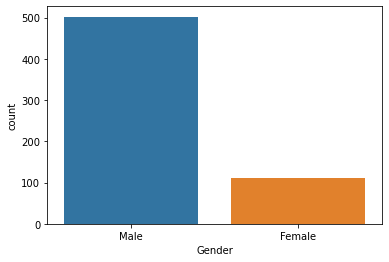

In [55]:
sns.countplot(df['Gender'])

### MALES CANDIDATES ARE HIGHER THAN FEMALE CANDIDATES 

<AxesSubplot:xlabel='Married', ylabel='count'>

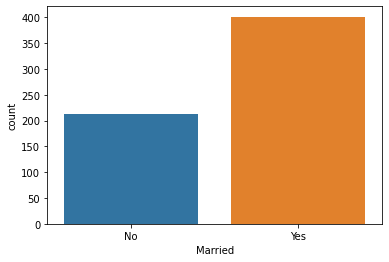

In [56]:
sns.countplot(df['Married'])

### CLOSE TO 400 INDIVIDUALS ARE MARRIED

<AxesSubplot:xlabel='Dependents', ylabel='count'>

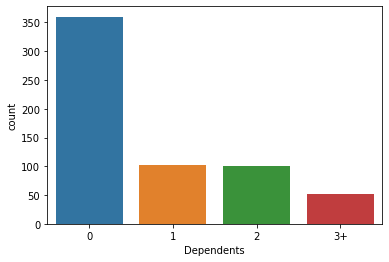

In [57]:
sns.countplot(df['Dependents'])

### MAJORITY OF THE INDIVIDUALS HAVE 0 DEPENDENTS 

<AxesSubplot:xlabel='Education', ylabel='count'>

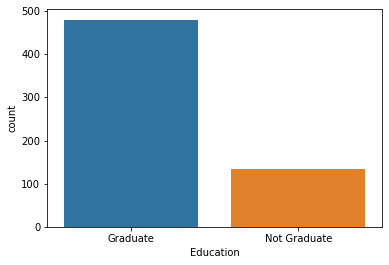

In [146]:
sns.countplot(df['Education'])

### MAJORITY OF THE INDIVIDUALS ARE GRADUATED 

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

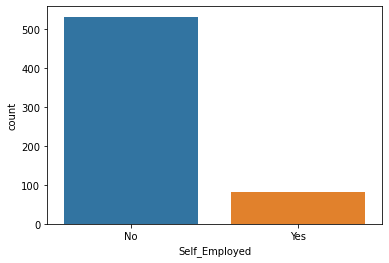

In [59]:
sns.countplot(df['Self_Employed'])

### CLOSE TO 500 INDIVIDUALS ARE NOT SELF EMPLOYED 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

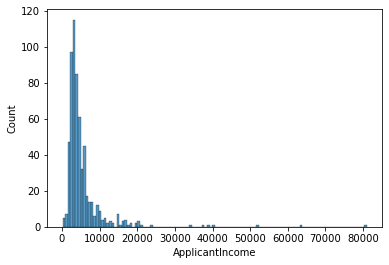

In [60]:
sns.histplot(df['ApplicantIncome'])

### APPLICANT'S INCOME RANGES BETWEEN 0-10000

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

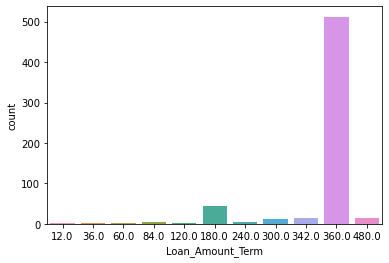

In [61]:
sns.countplot(df['Loan_Amount_Term'])

### MAJORITY LOAN AMOUNT TERM IS 36 MONTHS 

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

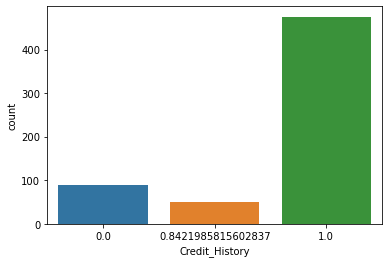

In [62]:
sns.countplot(df['Credit_History'])

### MAJORITY OF INDIVIDUALS HAVE A CREDIT HISTORY OF 1 

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

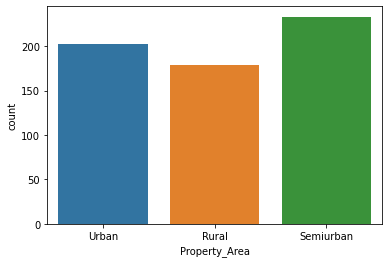

In [63]:
sns.countplot(df['Property_Area'])

### MOSTLY THE INDIVIDUALS BELONG TO SEMI URBAN REGION

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

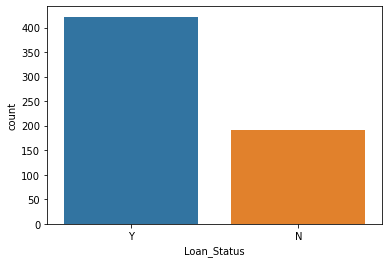

In [64]:
sns.countplot(df['Loan_Status'])

### MOST OF THE EMPLOYESS HAVE A POSITIVE LOAN STATUS 

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

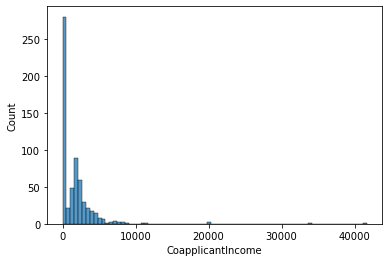

In [65]:
sns.histplot(df['CoapplicantIncome'])

### MOST OF THE CO-APPLICANT INCOME RANGES BETWEEN 0-10000

## GRAPHICAL BIVARIATE ANALYSIS

<AxesSubplot:xlabel='ApplicantIncome'>

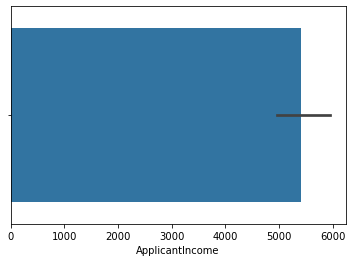

In [70]:
sns.barplot(x='ApplicantIncome',data=df,hue='Loan_Status')

### MAJORITY OF THE APPLICANTS INCOME RANGE BETWEEN 0-5000

<AxesSubplot:xlabel='CoapplicantIncome'>

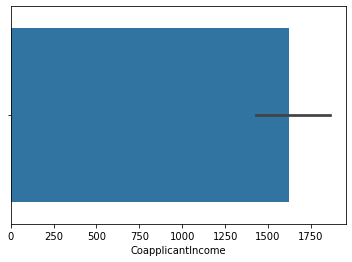

In [148]:
sns.barplot(x='CoapplicantIncome',data=df,hue='Loan_Status')

### MAJORITY OF THE CO-APPLICANTS INCOME RANGE BETWEEN 0-1500

<AxesSubplot:xlabel='Education', ylabel='count'>

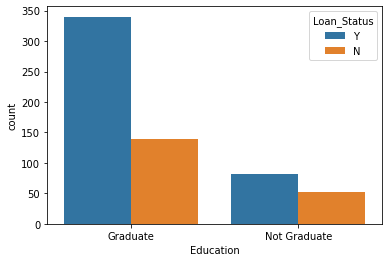

In [69]:
sns.countplot(x='Education',data=df,hue='Loan_Status')

### MAJORITY OF THE PEOPLE WHO HAVE A POSITIVE LOAN STATUS ARE GRADUATES 

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

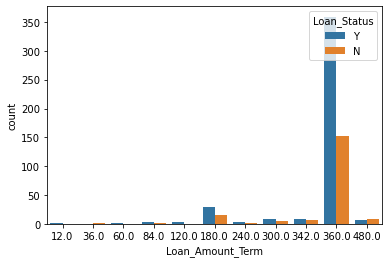

In [72]:
sns.countplot(x='Loan_Amount_Term',data=df,hue='Loan_Status')

### MAJORITY OF THE LOAN AMOUNT TERM IS 36 MONTHS WHERE LOAN STATUS IS POSITIVE 

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

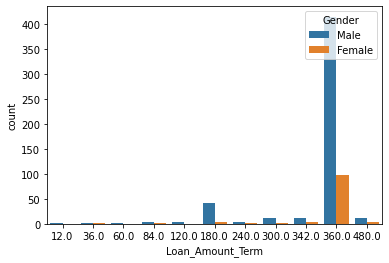

In [104]:
sns.countplot(x='Loan_Amount_Term',data=df,hue='Gender')

### MAJORITY OF THE LOAN AMOUNT TERM IS 36 MONTHS WHERE MALE CANDIDATES ARE HIGHER

<AxesSubplot:xlabel='Loan_Amount_Term'>

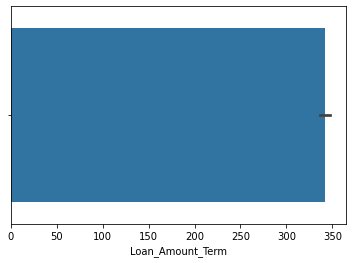

In [105]:
sns.barplot(x='Loan_Amount_Term',data=df,hue='Gender')

### MAJORITY OF THE LOAN AMOUNT TERM IS 340

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

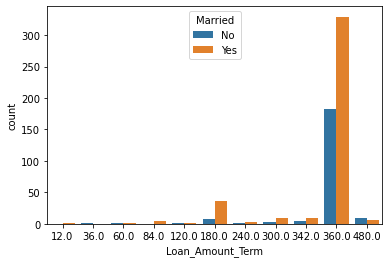

In [106]:
sns.countplot(x='Loan_Amount_Term',data=df,hue='Married')

### MAJORITY OF THE LOAN AMOUNT TERM IS 36 MONTHS WHERE THE COUNT OF MARRIED CANDIDATES ARE HIGHER 

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

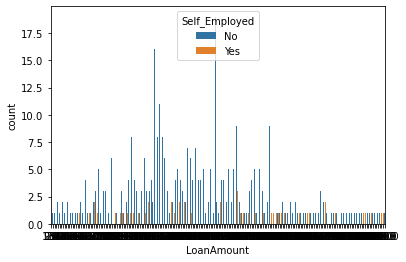

In [81]:
sns.countplot(x='LoanAmount',data=df,hue='Self_Employed')

### THE DATA IS VERY DISPERSED 

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

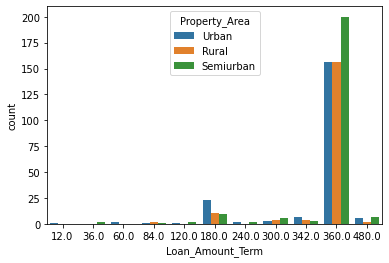

In [94]:
sns.countplot(x='Loan_Amount_Term',data=df,hue='Property_Area')

### MAJORITY OF THE LOAN AMOUNT TERM IS 36 MONTHS WHERE THE INDIVIDUALS MOSTLY BELONG TO SEMIURBAN REGIONS 

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

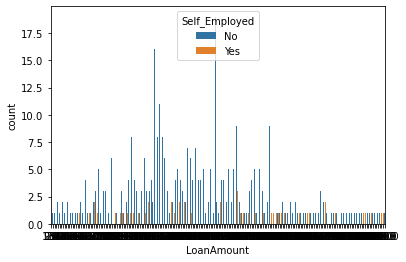

In [102]:
sns.countplot(x='LoanAmount',data=df,hue='Self_Employed')

### THE DATA IS VERY DISPERSED 

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

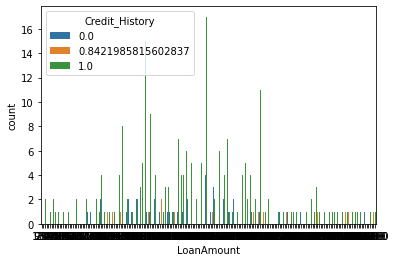

In [99]:
sns.countplot(x='LoanAmount',data=df,hue='Credit_History')

### CREDIT HISTORY IS MAJORLY 1 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

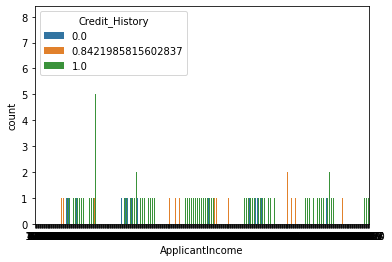

In [95]:
sns.countplot(x='ApplicantIncome',data=df,hue='Credit_History')

### CREDIT HISTORY IS MAJORLY 1 

<AxesSubplot:xlabel='ApplicantIncome'>

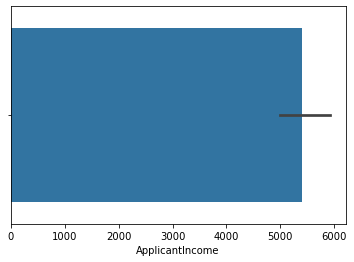

In [96]:
sns.barplot(x='ApplicantIncome',data=df,hue='Loan_Status')

### APPLICANT INCOME RANGES BETWEEN 1000-5000

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

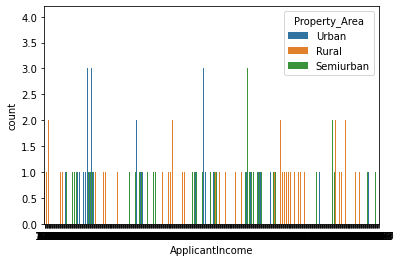

In [85]:
sns.countplot(x='ApplicantIncome',data=df,hue='Property_Area')

### APPLICANTS MOSTLY BELONG TO SEMI URBAN AREAS

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

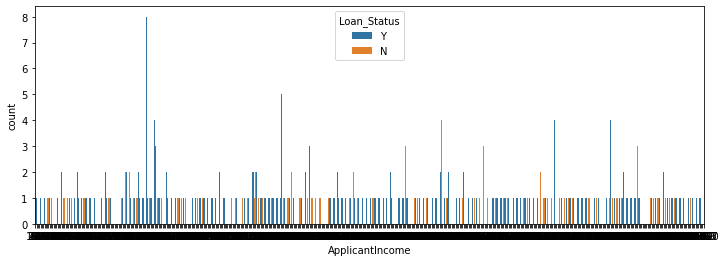

In [100]:
plt.figure(figsize=(12,4))
sns.countplot(x='ApplicantIncome',data=df,hue='Loan_Status')

### THERE IS A MIX OF BOTH POSITIVE AND NEGATIVE LOAN STATUS ACCROSS APPLICANT INCOME 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

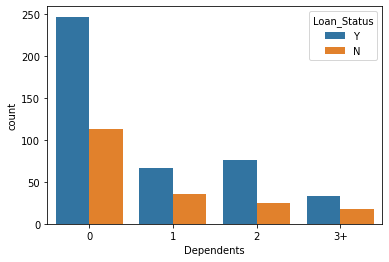

In [87]:
sns.countplot(x='Dependents',data=df,hue='Loan_Status')

### MAJORITY INDIVIDUALS HAVE 0 DEPENDENTS WHERE THERE IS POSITIVE LOAN STATUS 

<AxesSubplot:xlabel='Education', ylabel='count'>

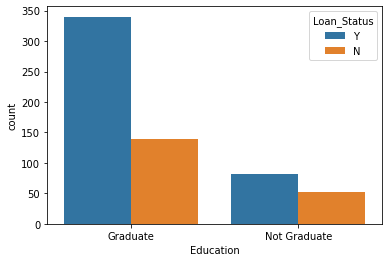

In [88]:
sns.countplot(x='Education',data=df,hue='Loan_Status')

### GRAADUATES HAVE A HIGHER COUNT AND A HIGHER POSITIVE LOAN STATUS

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

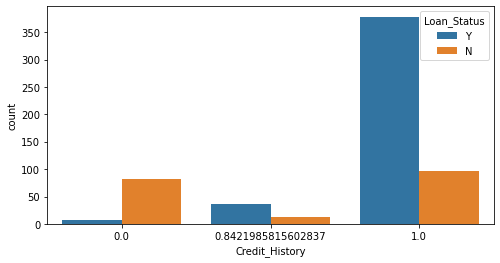

In [101]:
plt.figure(figsize=(8,4))
sns.countplot(x='Credit_History',data=df,hue='Loan_Status')

### MAX CREDIT HISTORY IS 1 WHERE THERE IS A HIGHER POSITIVE LOAN STATUS

<AxesSubplot:xlabel='Dependents', ylabel='ApplicantIncome'>

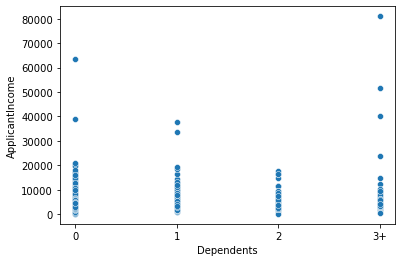

In [108]:
sns.scatterplot(x='Dependents',y='ApplicantIncome',data=df)

### INDIVIDUALS WITH 3+ DEPENDENTS HAVE A HIGHER APPLICANT INCOME

<AxesSubplot:xlabel='Dependents', ylabel='CoapplicantIncome'>

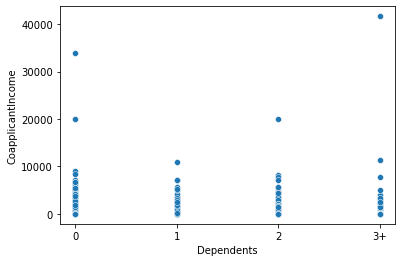

In [109]:
sns.scatterplot(x='Dependents',y='CoapplicantIncome',data=df)

### INDIVIDUALS WITH 3+ DEPENDENTS HAVE A HIGHER CO-APPLICANT INCOME

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

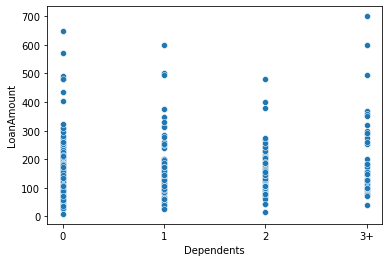

In [110]:
sns.scatterplot(x='Dependents',y='LoanAmount',data=df)

### INDIVIDUALS WITH 3+ DEPENDENTS HAVE A HIGHER LOAN AMOUNT

<AxesSubplot:xlabel='Dependents', ylabel='Loan_Amount_Term'>

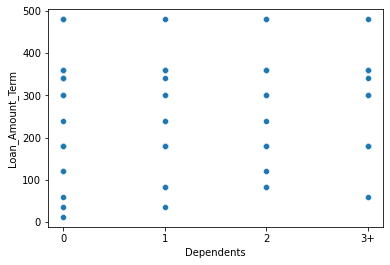

In [111]:
sns.scatterplot(x='Dependents',y='Loan_Amount_Term',data=df)

### IT IS CONSISTENT , 

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Amount_Term'>

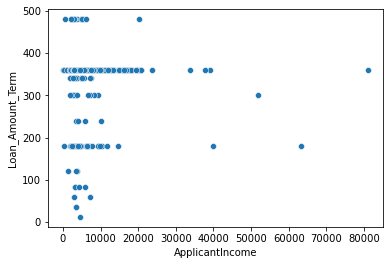

In [112]:
sns.scatterplot(x='ApplicantIncome',y='Loan_Amount_Term',data=df)

### APPLICANT INCOME RANGES BETWEEN 0-2000 WHERE AS LOAN AMOUNT TERM RANGES FOM 0-500

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

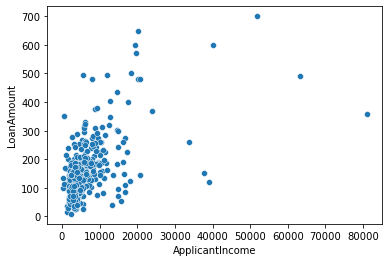

In [113]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=df)

### APPLICANT INCOME RANGES BETWEEN 0-20000 WHERE AS LOAN AMOUNT RANGES MAX BETWEEN 0-300

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

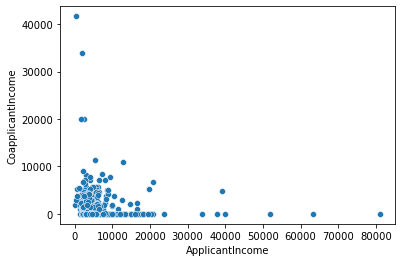

In [114]:
sns.scatterplot(x='ApplicantIncome',y='CoapplicantIncome',data=df)

### APPLICANT INCOME RANGES BETWEEN 0-20000 WHERE AS CO-APPLICANT INCOME IS MAX BETWEEN 0-10000

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='LoanAmount'>

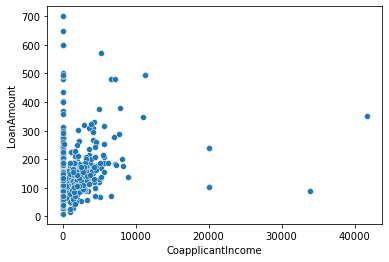

In [115]:
sns.scatterplot(x='CoapplicantIncome',y='LoanAmount',data=df)

### CO-APPLICANT INCOME RANGES BETWEEN 0-10000 WHERE AS THE LOAN AMOUNT RANGES FROM 0-700

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Amount_Term'>

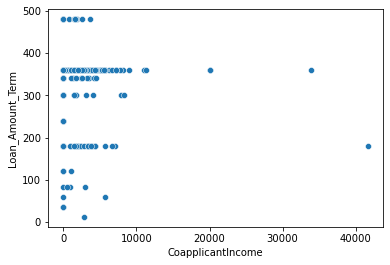

In [116]:
sns.scatterplot(x='CoapplicantIncome',y='Loan_Amount_Term',data=df)

### CO-APPLICANT INCOME RNAGES BETWEEN 0-1000

## GRAPHICAL MULTIVARIATE ANALYSIS 

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

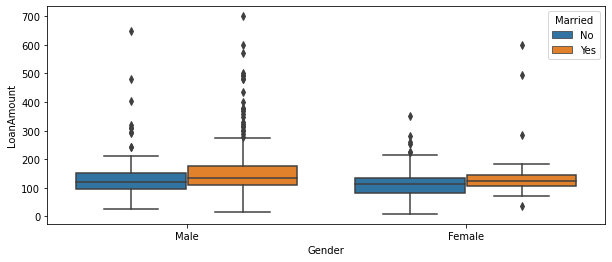

In [141]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Gender',y='LoanAmount',data=df, hue='Married')

### LOAN AMOUNT IS HIGHER FOR MARRIED MALES 

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

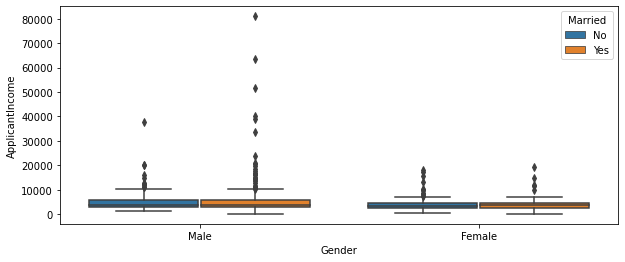

In [142]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Gender',y='ApplicantIncome',data=df, hue='Married')

### APPLICANT INCOMES IS HIGHER IN CASE OF MARRIED MALE APPLICANTS 

<AxesSubplot:xlabel='Gender', ylabel='CoapplicantIncome'>

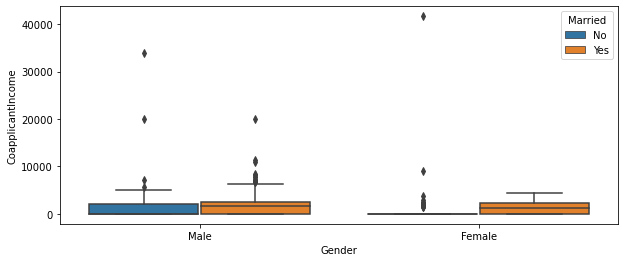

In [143]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Gender',y='CoapplicantIncome',data=df, hue='Married')

### CO APPLICANT INCOMES IS HIGHER IN CASE OF MARRIED MALE APPLICANTS 

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

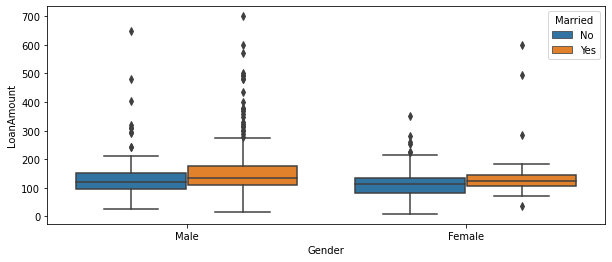

In [144]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Gender',y='LoanAmount',data=df, hue='Married')

###  LOAN AMOUNT IS HIGHER IN CASE OF MARRIED MALE APPLICANTS 

<AxesSubplot:xlabel='Gender', ylabel='Loan_Amount_Term'>

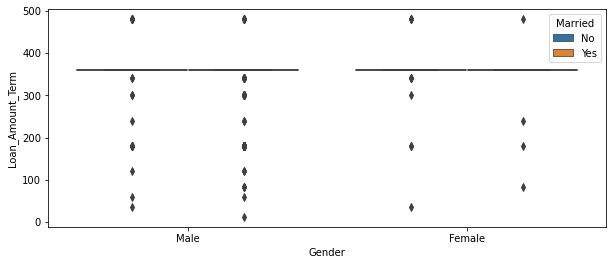

In [145]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Gender',y='Loan_Amount_Term',data=df, hue='Married')

### LOAN AMOUNT TERM US SAME FOR BOTH THE GENDERS WHETHER MARRIED OR NOT 

<AxesSubplot:xlabel='Gender', ylabel='Loan_Amount_Term'>

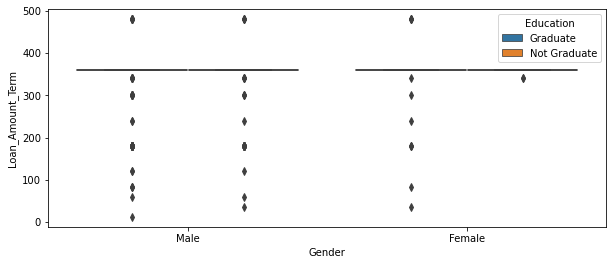

In [119]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Gender',y='Loan_Amount_Term',data=df, hue='Education')

### LOAN AMOUNT TERM US SAME FOR BOTH THE GENDERS WHETHER GRADUATE OR NOT 

<AxesSubplot:xlabel='Gender', ylabel='Loan_Amount_Term'>

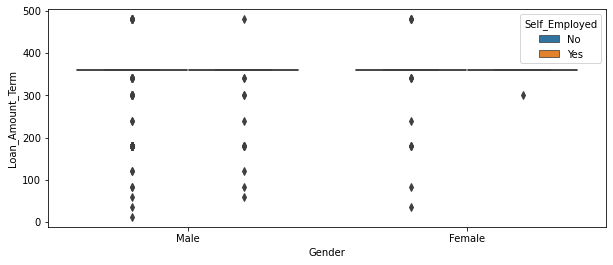

In [120]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Gender',y='Loan_Amount_Term',data=df, hue='Self_Employed')

### LOAN AMOUNT TERM US SAME FOR BOTH THE GENDERS WHETHER SELF EMPLOYED OR NOT 

<AxesSubplot:xlabel='Gender', ylabel='Loan_Amount_Term'>

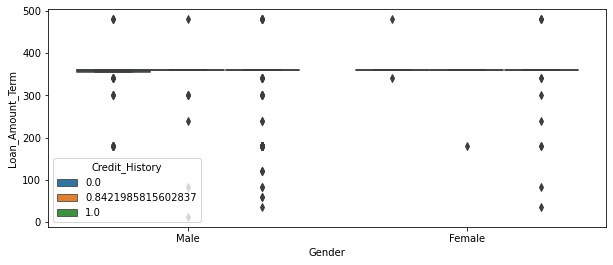

In [121]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Gender',y='Loan_Amount_Term',data=df, hue='Credit_History')

### LOAN AMOUNT TERM US SAME FOR BOTH THE GENDERS IRRESPECTIVE OF THER CREDIT HISTORY

<AxesSubplot:xlabel='Gender', ylabel='Loan_Amount_Term'>

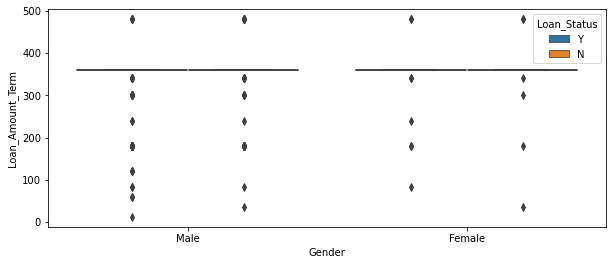

In [122]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Gender',y='Loan_Amount_Term',data=df, hue='Loan_Status')

### LOAN AMOUNT TERM US SAME FOR BOTH THE GENDERS IRRESPECTIVE OR THEIR LOAN STATUS

<AxesSubplot:xlabel='Married', ylabel='Loan_Amount_Term'>

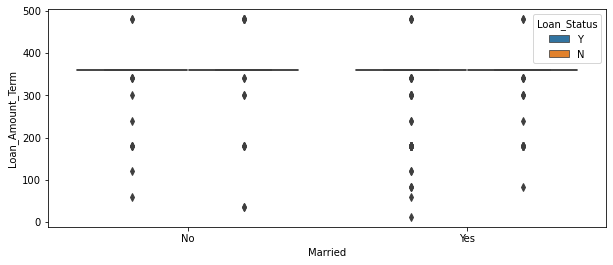

In [123]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Married',y='Loan_Amount_Term',data=df, hue='Loan_Status')

### LOAN AMOUNT TERM US SAME FOR BOTH THE GENDERS WHETHER MARRIED OR NOT 

<AxesSubplot:xlabel='Married', ylabel='Loan_Amount_Term'>

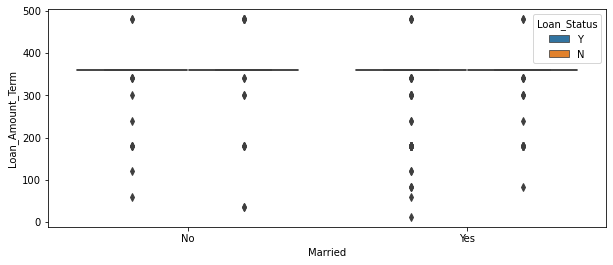

In [124]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Married',y='Loan_Amount_Term',data=df, hue='Loan_Status')

### LOAN AMOUNT TERM IS SAME FOR BOTH THE GENDERS WHETHER MARRIED OR NOT AND THEY HAVE A SIMILAR LOAN STATUS 

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Amount_Term'>

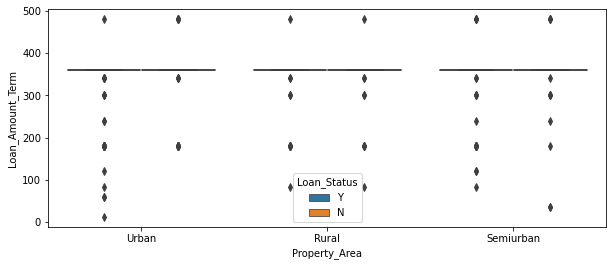

In [126]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Property_Area',y='Loan_Amount_Term',data=df, hue='Loan_Status')

### LOAN AMOUNT TERM US SAME FOR AL PROPERTY AREA

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Amount_Term'>

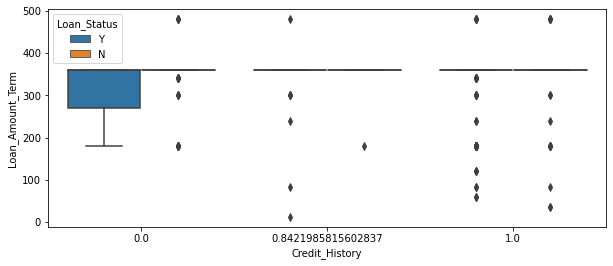

In [127]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Credit_History',y='Loan_Amount_Term',data=df, hue='Loan_Status')

### CREDIT HISTORY OF 0 HAS MAX POSITIVE LOAN STATUS AND A HIGHER LOAN AMOUNT TERM 

<AxesSubplot:xlabel='Credit_History', ylabel='LoanAmount'>

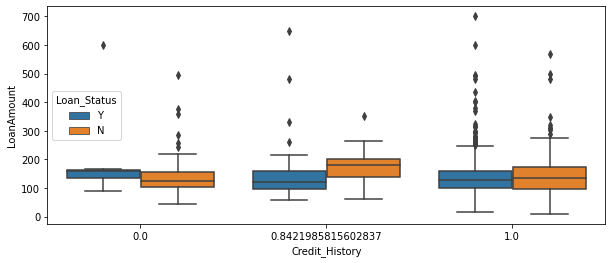

In [128]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Credit_History',y='LoanAmount',data=df, hue='Loan_Status')

### CREDIT HISTORY OF 1 HAS MAX NEGATIVE LOAN STATUS AND A HIGHER LOAN AMOUNT

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

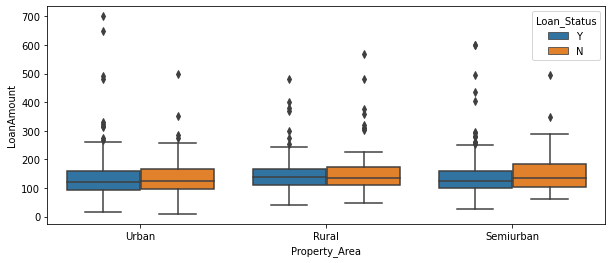

In [129]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Property_Area',y='LoanAmount',data=df, hue='Loan_Status')

### LOAN AMOUNT RANGES BETWEEN 100-350 IRRESPECTIVE OF THEIR PROPERTY TYPE AND THEY HAVE A SIMILAR LOAN STATUS 

<AxesSubplot:xlabel='Married', ylabel='LoanAmount'>

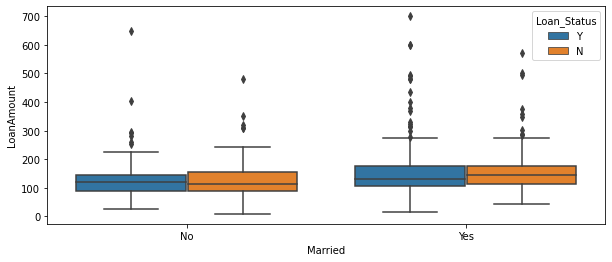

In [130]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Married',y='LoanAmount',data=df, hue='Loan_Status')

### LOAN AMOUNT RANGES BETWEEN 100-350 IRRESPECTIVE OF THEM BEING MARRIED OR NOT AND THEY HAVE A SIMILAR LOAN STATUS 

<AxesSubplot:xlabel='Education', ylabel='LoanAmount'>

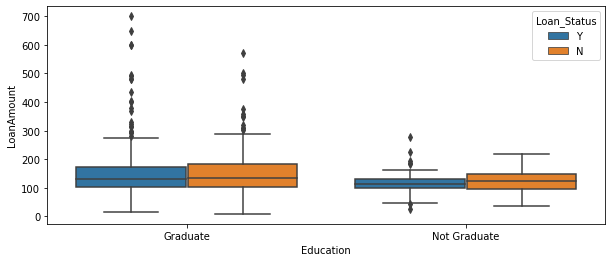

In [131]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Education',y='LoanAmount',data=df, hue='Loan_Status')

### LOAN AMOUNT RANGES BETWEEN 100-350 IRRESPECTIVE OF THEM BEING A GRADUATE OR NOT AND THEY HAVE A SIMILAR LOAN STATUS 

<AxesSubplot:xlabel='Education', ylabel='CoapplicantIncome'>

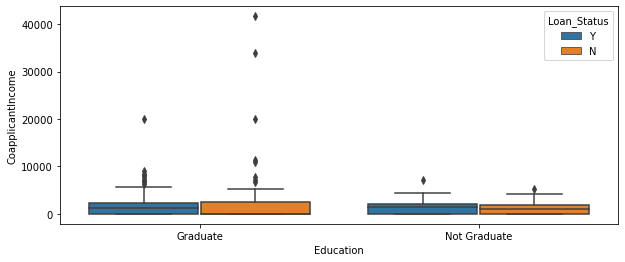

In [133]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Education',y='CoapplicantIncome',data=df, hue='Loan_Status')

### CO APPLICANTS INCOME IS ON THE LOWER SIDE IRRESPECTIVE OF THEM BEING A GRADUATE OR NOT AND THEY HAVE A SIMILAR LOAN STATUS 

<AxesSubplot:xlabel='Gender', ylabel='CoapplicantIncome'>

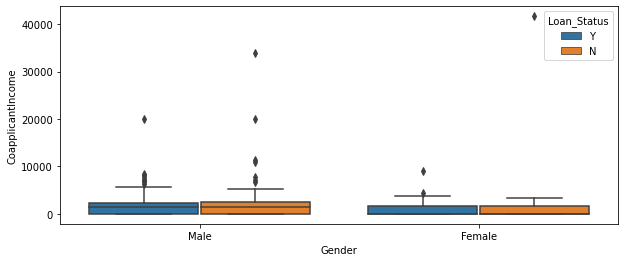

In [134]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Gender',y='CoapplicantIncome',data=df, hue='Loan_Status')

### CO APPLICANTS INCOME IS ON THE LOWER SIDE IRRESPECTIVE OF THEIE GENDER AND THEY HAVE A SIMILAR LOAN STATUS 

<AxesSubplot:xlabel='Married', ylabel='CoapplicantIncome'>

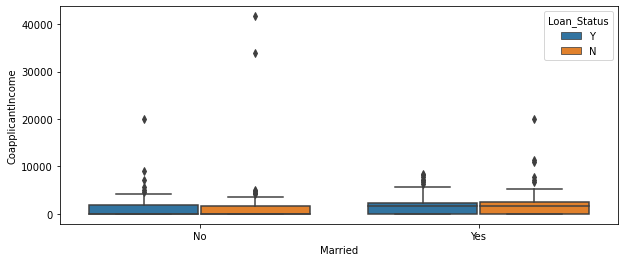

In [135]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Married',y='CoapplicantIncome',data=df, hue='Loan_Status')

### CO APPLICANTS INCOME IS ON THE LOWER SIDE IRRESPECTIVE OF THEM BEING A MARRIED OR NOT AND THEY HAVE A SIMILAR LOAN STATUS 

<AxesSubplot:xlabel='Education', ylabel='CoapplicantIncome'>

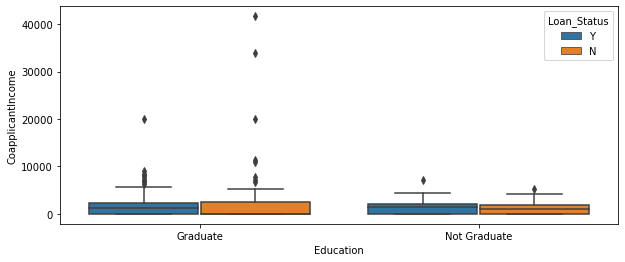

In [136]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Education',y='CoapplicantIncome',data=df, hue='Loan_Status')

### CO APPLICANTS INCOME IS ON THE LOWER SIDE IRRESPECTIVE OF THEM BEING A GRADUATE OR NOT AND THEY HAVE A SIMILAR LOAN STATUS 

<AxesSubplot:xlabel='Self_Employed', ylabel='CoapplicantIncome'>

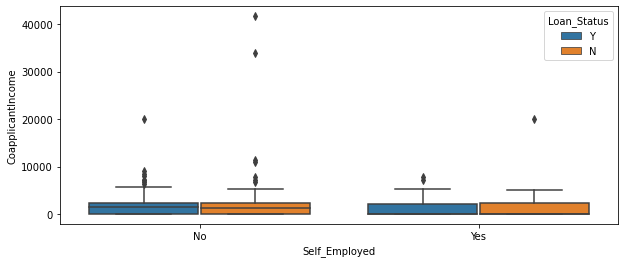

In [137]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Self_Employed',y='CoapplicantIncome',data=df, hue='Loan_Status')

### LOW CO APPLICANT INCOME IS OBSERVED IN SELF & NON SELF EMPLOYED INDIVIDUALS AND THEY MOSTLY HAVE SIMILAR LOAN STATUS 

<AxesSubplot:xlabel='Married', ylabel='CoapplicantIncome'>

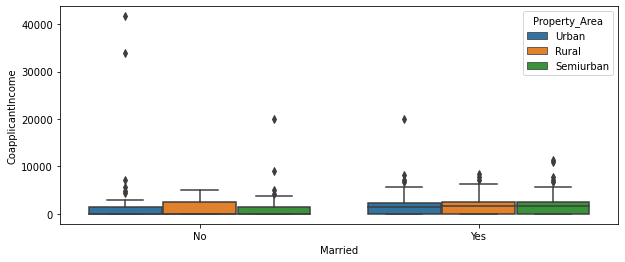

In [138]:
plt.figure(figsize=(10,4))
sns.boxplot(x='Married',y='CoapplicantIncome',data=df, hue='Property_Area')

### LOW CO APPLICANT INCOME IS OBSERVED IN BOTH MARRIED AND NON MARRIED INDIVIDUALS AND THEY MOSTLY HAIL FROM RURAL AREAS (NON MARRIED ONES)

## LABEL ENCODING - CONVERTING THE CATAGORICAL COLUMNS TO NUMERICAL ONES 

In [74]:
from sklearn.preprocessing import LabelEncoder

In [77]:
le=LabelEncoder()

In [78]:
df['Gender']=le.fit_transform(df['Gender'])

In [79]:
df['Married']=le.fit_transform(df['Married'])

In [86]:
df['Dependents']=le.fit_transform(df['Dependents'])

In [81]:
df['Education']=le.fit_transform(df['Education'])

In [82]:
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

In [83]:
df['Property_Area']=le.fit_transform(df['Property_Area'])

In [84]:
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

## DROPPING LOAN APPLICATION ID COLUMN AS ITS A SERIAL NUMBER ONLY 

In [87]:
df.drop(['Loan_ID'],inplace=True,axis=1)

In [88]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


## CORRELATION ANALYSIS 

In [85]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


<AxesSubplot:>

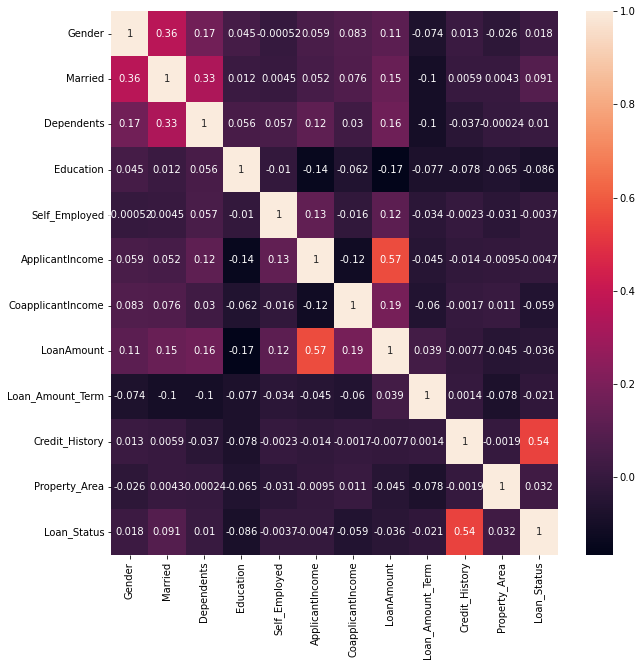

In [90]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

### LOW-MODERATE BOTH NEGATIVE & POSITIVE CORRELATION EXISTS BETWEEN THE COLUMNS

## CORRELATION WRT TARGET COLUMN

In [89]:
df.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540483
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

### ALL COLUMNS EXCEPT FOR CREDIT HISTORY HAVE A LOW NEGATIVE & POSITIVE CORRELATION WRT TARGET COLUMN AN CREDIT HISTORY HAS A HIGH POSITIVE CORRELATION WRT TARGET COLUMN

## OUTLIERS CHECK - VISUAL 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education'>

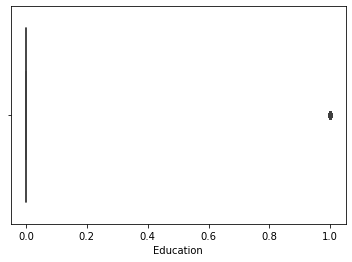

In [92]:
sns.boxplot(df['Education'])

### OUTLIERS ARE PRESENT 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

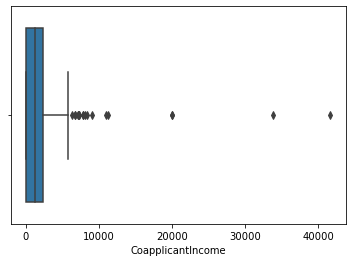

In [93]:
sns.boxplot(df['CoapplicantIncome'])

### OUTLIERS ARE PRESENT 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

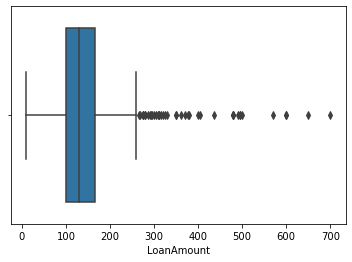

In [94]:
sns.boxplot(df['LoanAmount'])

### OUTLIERS ARE PRESENT 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Amount_Term'>

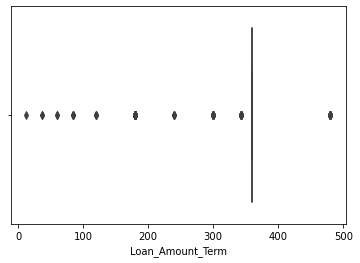

In [95]:
sns.boxplot(df['Loan_Amount_Term'])

### OUTLIERS ARE PRESENT 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

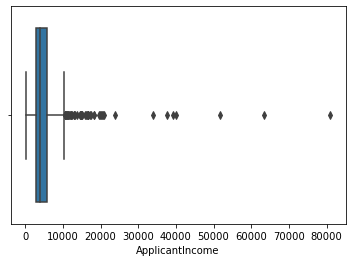

In [96]:
sns.boxplot(df['ApplicantIncome'])

### OUTLIERS ARE PRESENT 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed'>

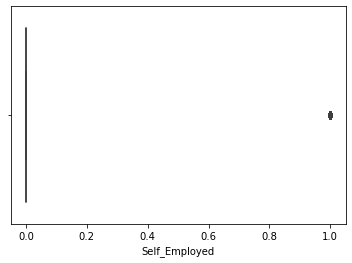

In [97]:
sns.boxplot(df['Self_Employed'])

### OUTLIERS ARE PRESENT 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents'>

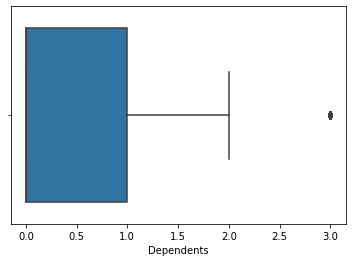

In [98]:
sns.boxplot(df['Dependents'])

### OUTLIERS ARE PRESENT 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender'>

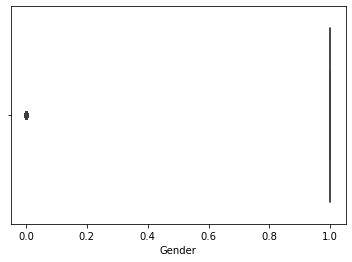

In [99]:
sns.boxplot(df['Gender'])

### OUTLIERS ARE PRESENT 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area'>

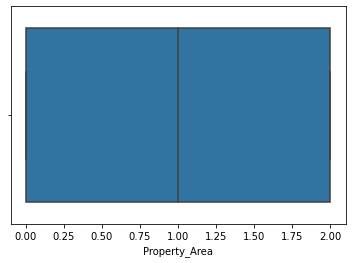

In [100]:
sns.boxplot(df['Property_Area'])

### NO OUTLIERS ARE PRESENT 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married'>

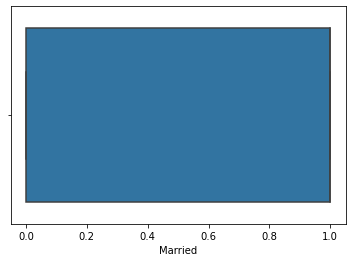

In [101]:
sns.boxplot(df['Married'])

### NO OUTLIERS ARE PRESENT 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History'>

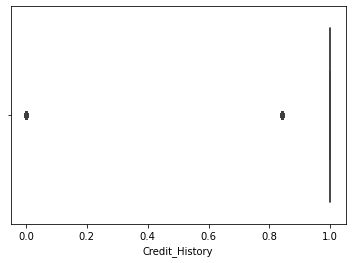

In [102]:
sns.boxplot(df['Credit_History'])

### OUTLIERS ARE PRESENT 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status'>

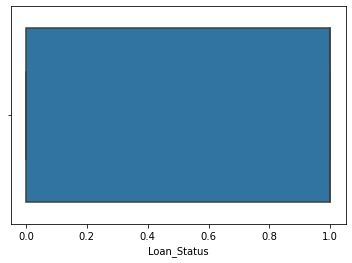

In [103]:
sns.boxplot(df['Loan_Status'])

### NO OUTLIERS ARE PRESENT 

## OUTLIERS REMOVAL -ZSCORE 

In [104]:
from scipy.stats import zscore

In [105]:
z=np.abs(zscore(df))

In [106]:
z

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,1.372089,0.737806,0.528362,0.392601,0.072991,0.554487,0.000000,0.279851,0.451640,1.223298,0.674519
1,0.472343,0.728816,0.253470,0.528362,0.392601,0.134412,0.038732,0.219273,0.279851,0.451640,1.318513,1.482537
2,0.472343,0.728816,0.737806,0.528362,2.547117,0.393747,0.554487,0.957641,0.279851,0.451640,1.223298,0.674519
3,0.472343,0.728816,0.737806,1.892641,0.392601,0.462062,0.251980,0.314547,0.279851,0.451640,1.223298,0.674519
4,0.472343,1.372089,0.737806,0.528362,0.392601,0.097728,0.554487,0.064454,0.279851,0.451640,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2.117107,1.372089,0.737806,0.528362,0.392601,0.410130,0.554487,0.898095,0.279851,0.451640,1.318513,0.674519
610,0.472343,0.728816,2.236021,0.528362,0.392601,0.212557,0.554487,1.267279,2.518655,0.451640,1.318513,0.674519
611,0.472343,0.728816,0.253470,0.528362,0.392601,0.437174,0.472404,1.269371,0.279851,0.451640,1.223298,0.674519
612,0.472343,0.728816,1.244745,0.528362,0.392601,0.357064,0.554487,0.483367,0.279851,0.451640,1.223298,0.674519


In [107]:
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [108]:
newdf1=df[(z<3).all(axis=1)]

In [109]:
newdf1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


## DATA LOSS 

In [112]:
df.shape

(614, 12)

In [113]:
newdf1.shape 

(577, 12)

In [114]:
(614-577)/614

0.06026058631921824

### THIS FALLS WITHIN OUR ACCEPTABLE RANGE OF 10% HENCE WE WILL MOVE FORWARD WITH THIS 

## SKEWNESS CHECK- VISUAL 

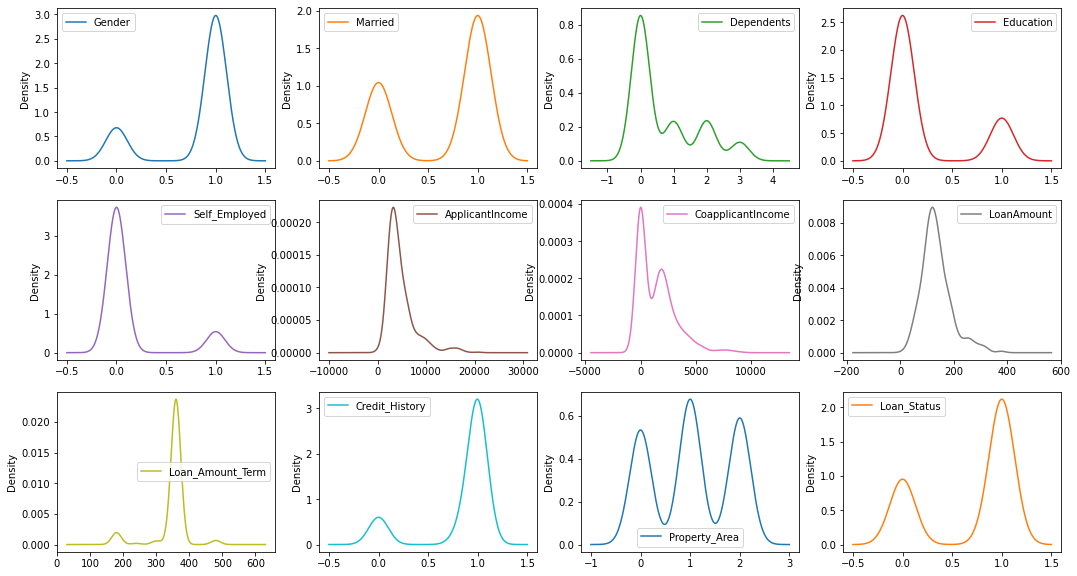

In [115]:
newdf1.plot(kind='density',subplots=True,figsize=(18,10),sharex=False,layout=(3,4))
plt.show()

### SKEWNESS IS PRESENT IN MANY COLUMNS 

## SKEWNESS 

In [116]:
newdf1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

### MOST OF THE COLUMNS WHIHC HAVE A HIGH SKEWNESS BELONG TO THE CATAGORICAL COLUMNS, AND OTHERS WHICH HAVE A HIGH SKEWNESS BELONGING TO FLOAT/INT VARIABLES WILL BE TREATED LATER USING POWER TRANSFORM 

## SEPARATING X & Y 

In [117]:
x=newdf1.drop(['Loan_Status'],axis=1)

In [118]:
y=newdf1.iloc[:,-1]

In [119]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [120]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

## MULTICOLINEARITY CHECK 

In [121]:
from scipy import stats

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [123]:
def cal_vif(x):
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif['VIF_FACTOR']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return(vif)

In [124]:
cal_vif(x)

,Variables,VIF_FACTOR
0,Gender,6.210386
1,Married,3.794428
2,Dependents,1.784545
3,Education,1.322954
4,Self_Employed,1.226933
5,ApplicantIncome,5.482613
6,CoapplicantIncome,2.492827
7,LoanAmount,11.377972
8,Loan_Amount_Term,13.219487
9,Credit_History,6.249068


### DROPPING LOAN_AMOUNT TERM FROM THE DATA SET AS THE SCORE IS ABOVE 10 

In [125]:
x1=x.drop(['Loan_Amount_Term'],axis=1)

In [126]:
def cal_vif(x1):
    vif=pd.DataFrame()
    vif['Variables']=x1.columns
    vif['VIF_FACTOR']=[variance_inflation_factor(x1.values,i)for i in range(x1.shape[1])]
    return(vif)

In [127]:
cal_vif(x1)

,Variables,VIF_FACTOR
0,Gender,5.830231
1,Married,3.793503
2,Dependents,1.782708
3,Education,1.279679
4,Self_Employed,1.226932
5,ApplicantIncome,5.461167
6,CoapplicantIncome,2.492790
7,LoanAmount,9.911877
8,Credit_History,4.711624
9,Property_Area,2.393281


### ALL THE COLUMNS HAVE SCORED WITHIN THE ACCEPTABLE RANGE OF 10, HENCE WE CAN CONCLUDE THAT THERE IS NO MULTICOLINEARITY PRSENT WITHIN THE COLUMNS 

## SKEWNESS REMOVAL 

In [128]:
from sklearn.preprocessing import power_transform

In [129]:
xnew=power_transform(x1)

In [131]:
b=pd.DataFrame(xnew, columns=x1.columns).skew().sort_values(ascending=True)

In [132]:
b

Gender              -1.622920
Credit_History      -1.588827
Married             -0.630211
CoapplicantIncome   -0.191876
Property_Area       -0.155094
ApplicantIncome      0.027981
LoanAmount           0.047692
Dependents           0.478360
Education            1.306588
Self_Employed        2.252848
dtype: float64

### ONLY CATEGORICAL COLUMNS HAVE SKEWNESS ABOVE THE ACCEPTABLE RANGE AND CREDIT HISTORY WHICH IS A FLOAT VARIABLE HAS SKEWNESS GRETAER THAN THE DESIRED RANGE 

## BALANCING THE DATA SET 

In [133]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

### THE DATA IS CLEARLY UNBALANCED , HENCE WE WILL USE SMOTE TO BALANCE THE SAME 

In [134]:
from imblearn.over_sampling import SMOTE

In [135]:
smt=SMOTE()

In [136]:
X1,Y1=smt.fit_resample(xnew,y)

In [137]:
X1.shape

(796, 10)

In [138]:
Y1.shape

(796,)

In [139]:
Y1.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

## SCALING 

### SINCE WE HAVE USED POWER TRANSFORM IN OUR DATA SET WHILE REMOVING SKEWNESS, OUR DATA IS ALREADY SCALED, HENCE NO NEED TO SCALE AGAIN 

## MODEL TESTING AND TRAINING 

## DATA SET X1 & Y1

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

## LOGISTIC REGRESSION 

In [141]:
lr=LogisticRegression()

In [142]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    predr=lr.predict(x_train)
    pred=lr.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,predr))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,pred))
    print('\n')

At random_state {0} the training accuracy test is 0.7279874213836478
At random_state {0} the testing accuracy test is 0.69375


At random_state {1} the training accuracy test is 0.720125786163522
At random_state {1} the testing accuracy test is 0.7125


At random_state {2} the training accuracy test is 0.7374213836477987
At random_state {2} the testing accuracy test is 0.66875


At random_state {3} the training accuracy test is 0.7279874213836478
At random_state {3} the testing accuracy test is 0.6875


At random_state {4} the training accuracy test is 0.720125786163522
At random_state {4} the testing accuracy test is 0.725


At random_state {5} the training accuracy test is 0.7405660377358491
At random_state {5} the testing accuracy test is 0.68125


At random_state {6} the training accuracy test is 0.7248427672955975
At random_state {6} the testing accuracy test is 0.70625


At random_state {7} the training accuracy test is 0.7264150943396226
At random_state {7} the testing accuracy 

### AT RANDOM STATE 13, WE HAVE THE HIGHEST ACCURACY OF 81.25% , HENCE WE WILL PROCEED WITH THAT 

In [162]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.20,random_state=13)

In [163]:
lr=LogisticRegression()

In [164]:
lr.fit(x_train,y_train)

LogisticRegression()

In [165]:
PRELR=lr.predict(x_test)

In [166]:
print(accuracy_score(y_test,PRELR))

0.8125


In [167]:
print(confusion_matrix(y_test,PRELR))

[[54 25]
 [ 5 76]]


In [149]:
print(classification_report(y_test,PRELR))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78        79
           1       0.75      0.94      0.84        81

    accuracy                           0.81       160
   macro avg       0.83      0.81      0.81       160
weighted avg       0.83      0.81      0.81       160



## AUC-ROC CURVE 

In [150]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [183]:
y_pred_prob1=lr.predict_proba(x_test)[:,1]

In [184]:
y_pred_prob1

array([0.58491254, 0.7459543 , 0.5820696 , 0.06597782, 0.17524745,
       0.65582254, 0.43461827, 0.60324685, 0.76058477, 0.0960113 ,
       0.54511514, 0.07933988, 0.72285794, 0.10696812, 0.75991081,
       0.07871949, 0.74214145, 0.56185344, 0.52839954, 0.65589693,
       0.69233209, 0.58944511, 0.12738228, 0.52681455, 0.7985907 ,
       0.52294969, 0.79439524, 0.75379682, 0.05945663, 0.62413182,
       0.10162541, 0.05798536, 0.53106477, 0.78543373, 0.09699954,
       0.58418167, 0.58427038, 0.31007062, 0.63147704, 0.05167706,
       0.59799444, 0.08152109, 0.73168338, 0.30481969, 0.75685259,
       0.80138037, 0.80369109, 0.03693401, 0.06330701, 0.15800332,
       0.76409844, 0.73555033, 0.06436031, 0.48754412, 0.75046503,
       0.11443872, 0.62734612, 0.65998987, 0.64882233, 0.61018098,
       0.76394381, 0.69992713, 0.52675195, 0.04456689, 0.5402101 ,
       0.63635013, 0.10901689, 0.04368741, 0.55456965, 0.078672  ,
       0.07923796, 0.04233612, 0.05135456, 0.73521685, 0.72042

In [185]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob1)

In [186]:
tpr

array([0.        , 0.        , 0.        , 0.01265823, 0.01265823,
       0.02531646, 0.02531646, 0.03797468, 0.03797468, 0.05063291,
       0.05063291, 0.06329114, 0.06329114, 0.07594937, 0.07594937,
       0.08860759, 0.08860759, 0.11392405, 0.11392405, 0.12658228,
       0.12658228, 0.13924051, 0.13924051, 0.15189873, 0.15189873,
       0.16455696, 0.16455696, 0.18987342, 0.18987342, 0.20253165,
       0.20253165, 0.26582278, 0.26582278, 0.29113924, 0.29113924,
       0.30379747, 0.30379747, 0.3164557 , 0.3164557 , 0.34177215,
       0.34177215, 0.37974684, 0.37974684, 0.39240506, 0.39240506,
       0.97468354, 0.97468354, 1.        ])

In [187]:
fpr

array([0.        , 0.01234568, 0.04938272, 0.04938272, 0.09876543,
       0.09876543, 0.22222222, 0.22222222, 0.30864198, 0.30864198,
       0.38271605, 0.38271605, 0.40740741, 0.40740741, 0.44444444,
       0.44444444, 0.49382716, 0.49382716, 0.56790123, 0.56790123,
       0.62962963, 0.62962963, 0.66666667, 0.66666667, 0.7037037 ,
       0.7037037 , 0.72839506, 0.72839506, 0.77777778, 0.77777778,
       0.82716049, 0.82716049, 0.86419753, 0.86419753, 0.87654321,
       0.87654321, 0.9382716 , 0.9382716 , 0.95061728, 0.95061728,
       0.96296296, 0.96296296, 0.97530864, 0.97530864, 0.98765432,
       0.98765432, 1.        , 1.        ])

In [188]:
thresholds

array([1.815423  , 0.815423  , 0.80138037, 0.7985907 , 0.78543373,
       0.77806083, 0.75379682, 0.75155295, 0.73482443, 0.73475827,
       0.72285794, 0.72229234, 0.70906951, 0.69992713, 0.6909918 ,
       0.68552343, 0.67331613, 0.66439678, 0.65460219, 0.65341987,
       0.63319179, 0.63147704, 0.62596346, 0.62413182, 0.60579597,
       0.60324685, 0.59799444, 0.586827  , 0.5820696 , 0.57461188,
       0.56969162, 0.55795362, 0.54218203, 0.53106477, 0.52927606,
       0.52839954, 0.5162099 , 0.50671919, 0.49021626, 0.43461827,
       0.40688409, 0.30481969, 0.3019635 , 0.2653784 , 0.23918129,
       0.04007458, 0.03979114, 0.03693401])

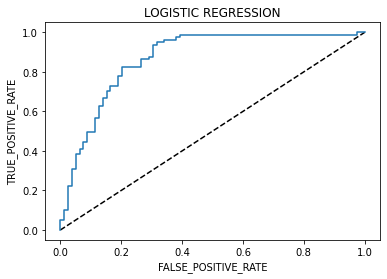

In [189]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='LR')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('LOGISTIC REGRESSION')
plt.show()

In [190]:
auc_score=roc_auc_score(y_test,(lr.predict(x_test)))
auc_score

0.81090795436787

## SVC

In [159]:
svc=SVC()

In [160]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.20,random_state=i)
    svc.fit(x_train,y_train)
    predsvc=svc.predict(x_train)
    predsvc1=svc.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,predsvc))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,predsvc1))
    print('\n')

At random_state {0} the training accuracy test is 0.8191823899371069
At random_state {0} the testing accuracy test is 0.725


At random_state {1} the training accuracy test is 0.7924528301886793
At random_state {1} the testing accuracy test is 0.775


At random_state {2} the training accuracy test is 0.8128930817610063
At random_state {2} the testing accuracy test is 0.73125


At random_state {3} the training accuracy test is 0.8113207547169812
At random_state {3} the testing accuracy test is 0.69375


At random_state {4} the training accuracy test is 0.8050314465408805
At random_state {4} the testing accuracy test is 0.725


At random_state {5} the training accuracy test is 0.809748427672956
At random_state {5} the testing accuracy test is 0.73125


At random_state {6} the training accuracy test is 0.8160377358490566
At random_state {6} the testing accuracy test is 0.66875


At random_state {7} the training accuracy test is 0.8034591194968553
At random_state {7} the testing accuracy t

### AT RANDOM STATE 13, WE HAVE THE HIGHEST ACCURACY OF 81.25% , HENCE WE WILL PROCEED WITH THAT 

In [168]:
svc=SVC(probability=True)

In [169]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.20,random_state=13)

In [170]:
svc.fit(x_train,y_train)

SVC(probability=True)

In [171]:
PRESVC=svc.predict(x_test)

In [172]:
print(accuracy_score(y_test,PRESVC))

0.8125


In [173]:
print(confusion_matrix(y_test,PRESVC))

[[64 15]
 [15 66]]


In [174]:
print(classification_report(y_test,PRESVC))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        79
           1       0.81      0.81      0.81        81

    accuracy                           0.81       160
   macro avg       0.81      0.81      0.81       160
weighted avg       0.81      0.81      0.81       160



## AUC-ROC CURVE 

In [175]:
y_pred_prob2=svc.predict_proba(x_test)[:,1]

In [176]:
y_pred_prob2

array([0.17857264, 0.81403232, 0.54994679, 0.12260569, 0.10865015,
       0.52602989, 0.21887159, 0.15851873, 0.75494419, 0.13184003,
       0.1974203 , 0.07487229, 0.763882  , 0.13055361, 0.84938352,
       0.114748  , 0.75296957, 0.24995167, 0.5       , 0.77026916,
       0.70340518, 0.29258252, 0.09002584, 0.14904336, 0.83495044,
       0.51951246, 0.81565278, 0.61908591, 0.14355861, 0.7534768 ,
       0.17352249, 0.28976665, 0.36778263, 0.8070464 , 0.30933984,
       0.30724432, 0.52624318, 0.24251321, 0.78329209, 0.10765571,
       0.79453945, 0.11190353, 0.80238423, 0.30037003, 0.80655078,
       0.82235657, 0.52916452, 0.13264435, 0.10338189, 0.13297012,
       0.75327649, 0.76433289, 0.13696318, 0.30288737, 0.85234663,
       0.1185849 , 0.79115721, 0.51490673, 0.72896811, 0.20392046,
       0.7663944 , 0.68314084, 0.52401947, 0.08232763, 0.61450791,
       0.60581768, 0.11385734, 0.06504779, 0.18748249, 0.17996091,
       0.10125866, 0.08867536, 0.12334665, 0.69941982, 0.73626

In [177]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob2)

In [178]:
tpr

array([0.        , 0.        , 0.        , 0.02531646, 0.02531646,
       0.05063291, 0.05063291, 0.06329114, 0.06329114, 0.07594937,
       0.07594937, 0.08860759, 0.08860759, 0.10126582, 0.10126582,
       0.11392405, 0.11392405, 0.12658228, 0.12658228, 0.15189873,
       0.15189873, 0.16455696, 0.16455696, 0.17721519, 0.17721519,
       0.18987342, 0.18987342, 0.21518987, 0.21518987, 0.24050633,
       0.24050633, 0.25316456, 0.25316456, 0.35443038, 0.35443038,
       0.39240506, 0.39240506, 0.40506329, 0.40506329, 0.43037975,
       0.43037975, 0.44303797, 0.44303797, 0.48101266, 0.48101266,
       0.94936709, 0.94936709, 1.        ])

In [179]:
fpr

array([0.        , 0.01234568, 0.07407407, 0.07407407, 0.25925926,
       0.25925926, 0.2962963 , 0.2962963 , 0.38271605, 0.38271605,
       0.56790123, 0.56790123, 0.60493827, 0.60493827, 0.62962963,
       0.62962963, 0.64197531, 0.64197531, 0.65432099, 0.65432099,
       0.66666667, 0.66666667, 0.7037037 , 0.7037037 , 0.81481481,
       0.81481481, 0.82716049, 0.82716049, 0.85185185, 0.85185185,
       0.87654321, 0.87654321, 0.88888889, 0.88888889, 0.90123457,
       0.90123457, 0.92592593, 0.92592593, 0.95061728, 0.95061728,
       0.96296296, 0.96296296, 0.97530864, 0.97530864, 0.98765432,
       0.98765432, 1.        , 1.        ])

In [180]:
thresholds

array([1.87038882, 0.87038882, 0.83862174, 0.82833144, 0.79081865,
       0.78329209, 0.77373263, 0.77268184, 0.75358523, 0.7534768 ,
       0.72572774, 0.7214432 , 0.71263598, 0.71154238, 0.69941982,
       0.68314084, 0.67855998, 0.67268494, 0.67260714, 0.65725631,
       0.61908591, 0.61450791, 0.59896476, 0.57650739, 0.51490673,
       0.5       , 0.40969871, 0.39836225, 0.36867792, 0.36147474,
       0.31326581, 0.30933984, 0.30724432, 0.24251321, 0.23370948,
       0.21887159, 0.1974203 , 0.19590689, 0.18748249, 0.17996091,
       0.17857264, 0.17352249, 0.16030517, 0.15851873, 0.14904336,
       0.08661719, 0.08656824, 0.06504779])

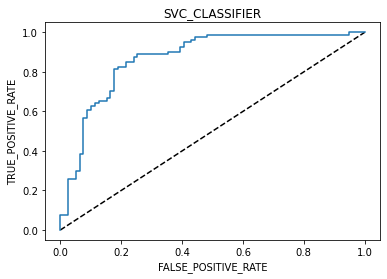

In [181]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='SVC')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('SVC_CLASSIFIER')
plt.show()

In [182]:
auc_score=roc_auc_score(y_test,(svc.predict(x_test)))
auc_score

0.812470698546648

## KNN CLASSIFIER

In [191]:
knn=KNeighborsClassifier()

In [192]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.20,random_state=i)
    knn.fit(x_train,y_train)
    predknn=knn.predict(x_train)
    predknn1=knn.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,predknn))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,predknn1))
    print('\n')

At random_state {0} the training accuracy test is 0.8569182389937107
At random_state {0} the testing accuracy test is 0.7625


At random_state {1} the training accuracy test is 0.8380503144654088
At random_state {1} the testing accuracy test is 0.7375


At random_state {2} the training accuracy test is 0.8364779874213837
At random_state {2} the testing accuracy test is 0.68125


At random_state {3} the training accuracy test is 0.8349056603773585
At random_state {3} the testing accuracy test is 0.73125


At random_state {4} the training accuracy test is 0.8443396226415094
At random_state {4} the testing accuracy test is 0.7625


At random_state {5} the training accuracy test is 0.8349056603773585
At random_state {5} the testing accuracy test is 0.78125


At random_state {6} the training accuracy test is 0.8427672955974843
At random_state {6} the testing accuracy test is 0.69375


At random_state {7} the training accuracy test is 0.8443396226415094
At random_state {7} the testing accura

### AT RANDOM STATE 20, WE HAVE HIGHEST ACCURACY OF 80.62%, HENCE WE WILL PROCEED WITH THAT 

In [193]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.20,random_state=20)

In [194]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [195]:
PREKNN=knn.predict(x_test)

In [196]:
print(accuracy_score(y_test,PREKNN))

0.80625


In [197]:
print(confusion_matrix(y_test,PREKNN))

[[64 19]
 [12 65]]


In [198]:
print(classification_report(y_test,PREKNN))

              precision    recall  f1-score   support

           0       0.84      0.77      0.81        83
           1       0.77      0.84      0.81        77

    accuracy                           0.81       160
   macro avg       0.81      0.81      0.81       160
weighted avg       0.81      0.81      0.81       160



## AUC-ROC CURVE

In [199]:
y_pred_prob3=knn.predict_proba(x_test)[:,1]

In [200]:
y_pred_prob3

array([0.6, 1. , 0.8, 0. , 0.4, 0. , 0.6, 1. , 0.6, 1. , 0.8, 1. , 0. ,
       1. , 0. , 1. , 0.8, 0. , 0.4, 0.4, 0.6, 0. , 0.6, 0.8, 0. , 0. ,
       0.4, 0.6, 0.6, 0. , 0. , 0.8, 0.4, 1. , 1. , 0. , 1. , 0. , 0.6,
       0.6, 0. , 0.8, 1. , 0.4, 0. , 0. , 0.6, 0.4, 0.8, 0. , 0.8, 0. ,
       1. , 0.8, 0.2, 0.2, 1. , 0.6, 0.6, 1. , 0.8, 0.6, 0.6, 0.2, 1. ,
       0.4, 0.8, 0. , 0.4, 1. , 0.2, 0.2, 0.2, 0. , 0.4, 1. , 1. , 0. ,
       0. , 0.6, 0.2, 0.4, 0.6, 0.2, 0. , 0.6, 0.2, 0.6, 0. , 1. , 0.4,
       1. , 1. , 0.6, 0.2, 0.2, 0.8, 1. , 0.4, 1. , 0. , 1. , 0.4, 0. ,
       0. , 0.8, 1. , 0.6, 0.6, 0. , 0.4, 0.6, 0.4, 0.2, 0.6, 0.6, 0.8,
       0. , 0.6, 0.8, 0.6, 0.2, 0.2, 0. , 1. , 0.6, 0.2, 0. , 1. , 0.2,
       0.2, 0.8, 0. , 1. , 0.4, 0.4, 0. , 0.6, 0.8, 0.4, 0.6, 1. , 0. ,
       0.2, 0.6, 0.2, 0. , 0.8, 1. , 1. , 0.8, 0.8, 0. , 0. , 0.2, 0.4,
       0.6, 1. , 0.6, 0.8])

In [201]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob3)

In [202]:
tpr

array([0.        , 0.01204819, 0.08433735, 0.22891566, 0.38554217,
       0.60240964, 1.        ])

In [203]:
fpr

array([0.        , 0.38961039, 0.58441558, 0.84415584, 0.93506494,
       0.96103896, 1.        ])

In [204]:
thresholds

array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

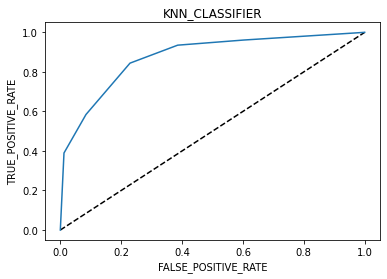

In [209]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='KNN')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('KNN_CLASSIFIER')
plt.show()

In [206]:
auc_score=roc_auc_score(y_test,(knn.predict(x_test)))
auc_score

0.8076200907526209

## DECISION TREE CLASSIFIER

In [210]:
dtc=DecisionTreeClassifier()

In [211]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.20,random_state=i)
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_train)
    preddtc1=dtc.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,preddtc))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,preddtc1))
    print('\n')

At random_state {0} the training accuracy test is 1.0
At random_state {0} the testing accuracy test is 0.775


At random_state {1} the training accuracy test is 1.0
At random_state {1} the testing accuracy test is 0.75


At random_state {2} the training accuracy test is 1.0
At random_state {2} the testing accuracy test is 0.7875


At random_state {3} the training accuracy test is 1.0
At random_state {3} the testing accuracy test is 0.76875


At random_state {4} the training accuracy test is 1.0
At random_state {4} the testing accuracy test is 0.8375


At random_state {5} the training accuracy test is 1.0
At random_state {5} the testing accuracy test is 0.78125


At random_state {6} the training accuracy test is 1.0
At random_state {6} the testing accuracy test is 0.8


At random_state {7} the training accuracy test is 1.0
At random_state {7} the testing accuracy test is 0.7875


At random_state {8} the training accuracy test is 1.0
At random_state {8} the testing accuracy test is 0.775

### AT RANDOM STATE 4, WE HAVE THE HIGHEST ACCURACY 83.75%

In [212]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.20,random_state=4)

In [213]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [214]:
PREDTC=dtc.predict(x_test)

In [215]:
print(accuracy_score(y_test,PREDTC))

0.84375


In [216]:
print(confusion_matrix(y_test,PREDTC))

[[68 13]
 [12 67]]


In [217]:
print(classification_report(y_test,PREDTC))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84        81
           1       0.84      0.85      0.84        79

    accuracy                           0.84       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.84      0.84      0.84       160



## AUC-ROC CURVE

In [218]:
y_pred_prob4=dtc.predict_proba(x_test)[:,1]

In [219]:
y_pred_prob4

array([1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1.])

In [220]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob4)

In [221]:
tpr

array([0.        , 0.16049383, 1.        ])

In [222]:
fpr

array([0.        , 0.84810127, 1.        ])

In [223]:
thresholds

array([2., 1., 0.])

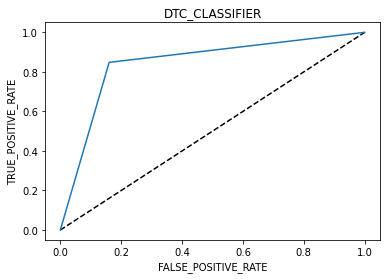

In [224]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='DTC')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('DTC_CLASSIFIER')
plt.show()

In [225]:
auc_score=roc_auc_score(y_test,(dtc.predict(x_test)))
auc_score

0.8438037193311455

## RANDOM FOREST CLASSIFIER

In [226]:
rm=RandomForestClassifier()

In [227]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.20,random_state=i)
    rm.fit(x_train,y_train)
    predrm=rm.predict(x_train)
    predrm1=rm.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,predrm))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,predrm1))
    print('\n')

At random_state {0} the training accuracy test is 1.0
At random_state {0} the testing accuracy test is 0.85


At random_state {1} the training accuracy test is 1.0
At random_state {1} the testing accuracy test is 0.8375


At random_state {2} the training accuracy test is 1.0
At random_state {2} the testing accuracy test is 0.825


At random_state {3} the training accuracy test is 1.0
At random_state {3} the testing accuracy test is 0.78125


At random_state {4} the training accuracy test is 1.0
At random_state {4} the testing accuracy test is 0.84375


At random_state {5} the training accuracy test is 1.0
At random_state {5} the testing accuracy test is 0.8125


At random_state {6} the training accuracy test is 1.0
At random_state {6} the testing accuracy test is 0.825


At random_state {7} the training accuracy test is 1.0
At random_state {7} the testing accuracy test is 0.81875


At random_state {8} the training accuracy test is 0.9984276729559748
At random_state {8} the testing accu

### AT RANDOM STATE 68, WE HAVE THE HIGHEST ACCURACY OF 89.37%, HENCE WE WILL PROCEED WITH THAT

In [228]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.20,random_state=68)

In [229]:
rm.fit(x_train,y_train)

RandomForestClassifier()

In [230]:
PRERM=rm.predict(x_test)

In [231]:
print(accuracy_score(y_test,PRERM))

0.89375


In [232]:
print(confusion_matrix(y_test,PRERM))

[[58  7]
 [10 85]]


In [233]:
print(classification_report(y_test,PRERM))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        65
           1       0.92      0.89      0.91        95

    accuracy                           0.89       160
   macro avg       0.89      0.89      0.89       160
weighted avg       0.90      0.89      0.89       160



## AUC ROC CURVE

In [234]:
y_pred_prob5=rm.predict_proba(x_test)[:,1]

In [235]:
y_pred_prob5

array([0.19, 0.97, 0.68, 0.57, 0.03, 0.77, 0.71, 0.02, 0.82, 0.52, 0.97,
       0.63, 0.83, 0.48, 0.11, 0.81, 0.48, 0.84, 0.2 , 0.52, 0.48, 0.49,
       0.45, 0.45, 0.71, 0.75, 0.5 , 0.59, 0.76, 0.02, 0.91, 0.57, 0.86,
       0.85, 0.88, 0.12, 0.69, 0.78, 0.03, 0.62, 0.03, 0.37, 0.96, 0.26,
       0.15, 0.01, 0.74, 0.08, 0.37, 0.09, 0.9 , 0.65, 0.85, 0.44, 0.91,
       0.13, 0.71, 0.89, 0.31, 0.15, 0.01, 0.61, 0.05, 0.38, 0.68, 0.  ,
       0.01, 0.68, 0.86, 0.9 , 0.34, 0.61, 0.88, 0.43, 0.55, 0.  , 0.41,
       0.96, 0.83, 0.87, 0.5 , 0.84, 0.73, 0.11, 0.85, 0.47, 0.39, 0.78,
       0.88, 0.54, 0.94, 0.69, 0.1 , 0.97, 0.27, 0.03, 0.82, 0.9 , 0.79,
       0.79, 0.68, 0.06, 0.05, 0.87, 0.06, 0.91, 0.83, 0.82, 0.94, 0.9 ,
       0.43, 0.29, 0.8 , 0.2 , 0.15, 0.74, 0.01, 0.84, 0.24, 0.76, 0.43,
       0.6 , 0.34, 0.54, 0.69, 0.84, 0.04, 0.8 , 0.6 , 0.68, 0.72, 0.8 ,
       0.86, 0.89, 0.53, 0.78, 0.34, 0.1 , 0.5 , 0.45, 0.01, 0.93, 0.02,
       0.07, 0.95, 0.16, 0.67, 0.63, 0.76, 0.98, 0.

In [236]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob5)

In [237]:
tpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01538462, 0.01538462, 0.01538462,
       0.01538462, 0.01538462, 0.01538462, 0.03076923, 0.03076923,
       0.03076923, 0.04615385, 0.06153846, 0.06153846, 0.06153846,
       0.06153846, 0.06153846, 0.06153846, 0.06153846, 0.06153846,
       0.06153846, 0.06153846, 0.06153846, 0.06153846, 0.06153846,
       0.07692308, 0.07692308, 0.09230769, 0.09230769, 0.10769231,
       0.10769231, 0.10769231, 0.10769231, 0.13846154, 0.15384615,
       0.16923077, 0.16923077, 0.2       , 0.2       , 0.21538462,
       0.21538462, 0.24615385, 0.27692308, 0.32307692, 0.4       ,
       0.43076923, 0.46153846, 0.50769231, 0.52307692, 0.64615385,
       0.66153846, 0.69230769, 0.70769231, 0.76923077, 0.83076923,
       0.87692308, 0.96923077, 1.        ])

In [238]:
fpr

array([0.        , 0.01052632, 0.07368421, 0.08421053, 0.10526316,
       0.11578947, 0.14736842, 0.17894737, 0.2       , 0.23157895,
       0.27368421, 0.33684211, 0.37894737, 0.4       , 0.43157895,
       0.44210526, 0.46315789, 0.47368421, 0.50526316, 0.51578947,
       0.54736842, 0.55789474, 0.57894737, 0.6       , 0.63157895,
       0.67368421, 0.72631579, 0.74736842, 0.77894737, 0.78947368,
       0.8       , 0.82105263, 0.82105263, 0.84210526, 0.84210526,
       0.86315789, 0.87368421, 0.89473684, 0.90526316, 0.90526316,
       0.92631579, 0.93684211, 0.94736842, 0.95789474, 0.97894737,
       0.98947368, 0.98947368, 0.98947368, 0.98947368, 0.98947368,
       0.98947368, 0.98947368, 0.98947368, 0.98947368, 0.98947368,
       0.98947368, 0.98947368, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

In [239]:
thresholds

array([1.98, 0.98, 0.96, 0.95, 0.94, 0.93, 0.91, 0.9 , 0.89, 0.88, 0.87,
       0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79, 0.78, 0.77, 0.76, 0.75,
       0.74, 0.72, 0.71, 0.69, 0.68, 0.65, 0.63, 0.62, 0.61, 0.6 , 0.59,
       0.57, 0.55, 0.54, 0.53, 0.52, 0.5 , 0.49, 0.48, 0.47, 0.45, 0.44,
       0.43, 0.41, 0.38, 0.37, 0.34, 0.24, 0.2 , 0.16, 0.15, 0.13, 0.09,
       0.08, 0.07, 0.06, 0.04, 0.03, 0.02, 0.01, 0.  ])

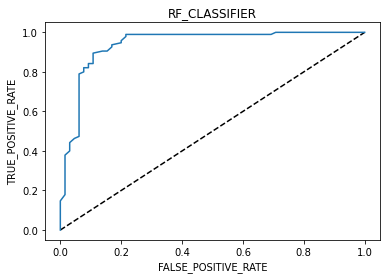

In [240]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='RFC')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('RF_CLASSIFIER')
plt.show()

In [241]:
auc_score=roc_auc_score(y_test,(rm.predict(x_test)))
auc_score

0.8935222672064778

## GRADIENT BOOST CLASSIFIER

In [242]:
xgb=GradientBoostingClassifier()

In [243]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.20,random_state=i)
    xgb.fit(x_train,y_train)
    predxgb=xgb.predict(x_train)
    predxgb1=xgb.predict(x_test)
    print('At random_state' ,{i}, 'the training accuracy test is', accuracy_score(y_train,predxgb))
    print('At random_state' ,{i}, 'the testing accuracy test is', accuracy_score(y_test,predxgb1))
    print('\n')

At random_state {0} the training accuracy test is 0.9261006289308176
At random_state {0} the testing accuracy test is 0.79375


At random_state {1} the training accuracy test is 0.9056603773584906
At random_state {1} the testing accuracy test is 0.825


At random_state {2} the training accuracy test is 0.9150943396226415
At random_state {2} the testing accuracy test is 0.79375


At random_state {3} the training accuracy test is 0.9182389937106918
At random_state {3} the testing accuracy test is 0.76875


At random_state {4} the training accuracy test is 0.9166666666666666
At random_state {4} the testing accuracy test is 0.84375


At random_state {5} the training accuracy test is 0.9088050314465409
At random_state {5} the testing accuracy test is 0.7625


At random_state {6} the training accuracy test is 0.9135220125786163
At random_state {6} the testing accuracy test is 0.8125


At random_state {7} the training accuracy test is 0.9355345911949685
At random_state {7} the testing accurac

### AT RANDOM STATE 78, WE HAVE THE HIGHEST ACCURACY OF 86.87%

In [244]:
x_train,x_test,y_train,y_test=train_test_split(X1,Y1,test_size=0.20,random_state=78)

In [245]:
xgb.fit(x_train,y_train)

GradientBoostingClassifier()

In [246]:
PREXGB=xgb.predict(x_test)

In [247]:
print(accuracy_score(y_test,PREXGB))

0.86875


In [248]:
print(confusion_matrix(y_test,PREXGB))

[[61 13]
 [ 8 78]]


In [249]:
print(classification_report(y_test,PREXGB))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        74
           1       0.86      0.91      0.88        86

    accuracy                           0.87       160
   macro avg       0.87      0.87      0.87       160
weighted avg       0.87      0.87      0.87       160



## AUC-ROC CURVE

In [250]:
y_pred_prob6=xgb.predict_proba(x_test)[:,1]

In [251]:
y_pred_prob6

array([0.86064719, 0.72271339, 0.67653054, 0.0413487 , 0.74426593,
       0.50244155, 0.64671694, 0.04592818, 0.03153134, 0.04427049,
       0.61459127, 0.0717606 , 0.82366979, 0.07443493, 0.69835189,
       0.32497148, 0.55410278, 0.69973714, 0.93420358, 0.41140432,
       0.06300272, 0.55027736, 0.40984031, 0.44063624, 0.06336127,
       0.89047683, 0.80998414, 0.65695603, 0.66995684, 0.90755016,
       0.70722849, 0.03203624, 0.69812933, 0.77016206, 0.07502008,
       0.19598174, 0.0317319 , 0.17931715, 0.05626394, 0.86746849,
       0.81604582, 0.69195807, 0.89933207, 0.84348915, 0.84416548,
       0.38794571, 0.03694313, 0.8160402 , 0.04177378, 0.79945845,
       0.71245965, 0.07348322, 0.19231566, 0.03154147, 0.82160307,
       0.77115416, 0.71846944, 0.06216836, 0.60503813, 0.41004221,
       0.60916281, 0.72388911, 0.19840498, 0.88200027, 0.39322465,
       0.40742956, 0.73555065, 0.04301632, 0.31392231, 0.32163208,
       0.77180008, 0.06536256, 0.37561457, 0.84606962, 0.04274

In [252]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob6)

In [253]:
tpr

array([0.        , 0.        , 0.        , 0.01351351, 0.01351351,
       0.02702703, 0.02702703, 0.05405405, 0.05405405, 0.06756757,
       0.06756757, 0.08108108, 0.08108108, 0.09459459, 0.09459459,
       0.12162162, 0.12162162, 0.13513514, 0.13513514, 0.14864865,
       0.14864865, 0.16216216, 0.16216216, 0.17567568, 0.17567568,
       0.2027027 , 0.2027027 , 0.21621622, 0.21621622, 0.24324324,
       0.24324324, 0.33783784, 0.33783784, 0.35135135, 0.35135135,
       0.74324324, 0.77027027, 1.        ])

In [254]:
fpr

array([0.        , 0.01162791, 0.05813953, 0.05813953, 0.11627907,
       0.11627907, 0.25581395, 0.25581395, 0.34883721, 0.34883721,
       0.59302326, 0.59302326, 0.60465116, 0.60465116, 0.61627907,
       0.61627907, 0.68604651, 0.68604651, 0.77906977, 0.77906977,
       0.86046512, 0.86046512, 0.87209302, 0.87209302, 0.90697674,
       0.90697674, 0.91860465, 0.91860465, 0.95348837, 0.95348837,
       0.96511628, 0.96511628, 0.98837209, 0.98837209, 1.        ,
       1.        , 1.        , 1.        ])

In [255]:
thresholds

array([1.96304296, 0.96304296, 0.92768966, 0.92180007, 0.90512983,
       0.89933207, 0.85736996, 0.85291504, 0.82366979, 0.82178347,
       0.72388911, 0.72271339, 0.7207209 , 0.71846944, 0.71245965,
       0.69973714, 0.66995684, 0.66367762, 0.60729531, 0.60503813,
       0.55410278, 0.55027736, 0.54265898, 0.51843642, 0.50244155,
       0.46293607, 0.44063624, 0.42066726, 0.41004221, 0.40984031,
       0.40742956, 0.31392231, 0.20856468, 0.19840498, 0.19598174,
       0.04136684, 0.0413487 , 0.00833025])

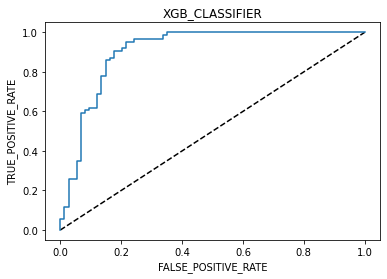

In [256]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='XGB')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('XGB_CLASSIFIER')
plt.show()

In [257]:
auc_score=roc_auc_score(y_test,(xgb.predict(x_test)))
auc_score

0.8656505342551853

## CROSS VAL SCORE 

In [260]:
for m in [lr,svc,knn,dtc,rm,xgb]:
    cv=cross_val_score(m,X1,Y1,cv=8)
    print('CV','is',(cv.mean()))

CV is 0.7148484848484848
CV is 0.7262500000000001
CV is 0.7576136363636363
CV is 0.7891792929292929
CV is 0.8407702020202019
CV is 0.7855429292929292


### THERE IS A SLIGHT CASE OF  OVERSITTING IN THE DATA SET

In [261]:
(81.25-71.48)

9.769999999999996

In [262]:
(81.25-72.62)

8.629999999999995

In [263]:
(80.62-75.76)

4.859999999999999

In [264]:
(84.37-78.91)

5.460000000000008

In [265]:
(89.37-84.07)

5.300000000000011

In [266]:
(86.87-78.55)

8.320000000000007

## IN TERMS OF DIFFERENCE BETWEEN CV MEAN SCORE AND MODEL ACCURACY, IT IS KNN MODEL BUT IF WE SEE ON ACCURACY POINT OF VIEW RANDOM FOREST CLASSIFIER IS ALSO VERY CLOSE, HARDLY A DIFFERENCE ON 0.50, HENCE WE WILL HYER TUNE BOTH THE MODELS AND SEE WHICH ONE PERFORMS BETTER

## HYPER TUNING -RANDOM FOREST CLASSIFIER 

In [267]:
RM2=RandomForestClassifier()

In [292]:
DD={'n_estimators':[50,100,150],'random_state':list(range(11)),'criterion':['gini','entropy','log_loss'],'min_samples_split':[2,3,4,],'min_samples_leaf':[1,2,3]}

In [293]:
gd=GridSearchCV(RM2,DD,cv=5,scoring='accuracy')

In [294]:
gd.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [295]:
gd.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 50,
 'random_state': 9}

In [296]:
RM3=RandomForestClassifier(n_estimators=50,random_state=9,criterion='entropy',min_samples_split=4,min_samples_leaf=1)

In [297]:
RM3.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=4,
                       n_estimators=50, random_state=9)

In [298]:
PRERM3=RM3.predict(x_test)

In [299]:
print(accuracy_score(y_test,PRERM3))

0.85


In [300]:
print(confusion_matrix(y_test,PRERM3))

[[58 16]
 [ 8 78]]


In [301]:
print(classification_report(y_test,PRERM3))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83        74
           1       0.83      0.91      0.87        86

    accuracy                           0.85       160
   macro avg       0.85      0.85      0.85       160
weighted avg       0.85      0.85      0.85       160



## AUC -ROC CURVE 

In [304]:
y_pred_prob7=RM3.predict_proba(x_test)[:,1]

In [305]:
y_pred_prob7

array([0.996     , 0.58404762, 0.83066667, 0.06666667, 0.75166667,
       0.63666667, 0.58166667, 0.        , 0.03      , 0.08666667,
       0.804     , 0.09333333, 0.62433333, 0.05      , 0.91066667,
       0.27990476, 0.60090476, 0.51      , 0.968     , 0.447     ,
       0.124     , 0.50038095, 0.60933333, 0.631     , 0.06233333,
       0.82966667, 0.787     , 0.95666667, 0.86833333, 0.92833333,
       0.78333333, 0.01733333, 0.80333333, 0.69933333, 0.10166667,
       0.35233333, 0.06      , 0.56866667, 0.085     , 0.83      ,
       0.82683333, 0.753     , 0.61766667, 0.94166667, 0.92766667,
       0.41866667, 0.02      , 0.69628571, 0.26333333, 0.78166667,
       0.75990476, 0.42204762, 0.16166667, 0.075     , 0.68566667,
       0.77833333, 0.684     , 0.14      , 0.37109524, 0.66033333,
       0.69216667, 0.672     , 0.515     , 0.89166667, 0.499     ,
       0.552     , 0.89833333, 0.04666667, 0.42857143, 0.397     ,
       0.79433333, 0.04333333, 0.40638095, 0.75666667, 0.03   

In [306]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob7)

In [307]:
tpr

array([0.        , 0.        , 0.        , 0.01351351, 0.01351351,
       0.01351351, 0.01351351, 0.01351351, 0.01351351, 0.02702703,
       0.02702703, 0.04054054, 0.04054054, 0.06756757, 0.06756757,
       0.08108108, 0.08108108, 0.09459459, 0.09459459, 0.10810811,
       0.10810811, 0.12162162, 0.12162162, 0.13513514, 0.13513514,
       0.14864865, 0.14864865, 0.18918919, 0.18918919, 0.22972973,
       0.22972973, 0.27027027, 0.27027027, 0.2972973 , 0.2972973 ,
       0.32432432, 0.32432432, 0.37837838, 0.37837838, 0.44594595,
       0.47297297, 0.81081081, 0.83783784, 0.85135135, 0.90540541,
       0.95945946, 1.        ])

In [308]:
fpr

array([0.        , 0.01162791, 0.08139535, 0.08139535, 0.18604651,
       0.20930233, 0.3372093 , 0.36046512, 0.39534884, 0.39534884,
       0.5       , 0.5       , 0.74418605, 0.74418605, 0.79069767,
       0.79069767, 0.8372093 , 0.8372093 , 0.84883721, 0.84883721,
       0.86046512, 0.86046512, 0.87209302, 0.87209302, 0.88372093,
       0.88372093, 0.89534884, 0.89534884, 0.90697674, 0.90697674,
       0.94186047, 0.94186047, 0.95348837, 0.95348837, 0.96511628,
       0.96511628, 0.98837209, 0.98837209, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [309]:
thresholds

array([1.996     , 0.996     , 0.956     , 0.953     , 0.89833333,
       0.89166667, 0.83      , 0.82966667, 0.82416667, 0.81933333,
       0.787     , 0.78333333, 0.68433333, 0.67966667, 0.65833333,
       0.6397619 , 0.62133333, 0.61766667, 0.61142857, 0.60933333,
       0.60090476, 0.58404762, 0.58166667, 0.56866667, 0.552     ,
       0.53433333, 0.534     , 0.515     , 0.51466667, 0.499     ,
       0.44433333, 0.41866667, 0.4107619 , 0.397     , 0.37333333,
       0.35442857, 0.30404762, 0.23866667, 0.23733333, 0.14      ,
       0.124     , 0.03733333, 0.03      , 0.024     , 0.02      ,
       0.01      , 0.        ])

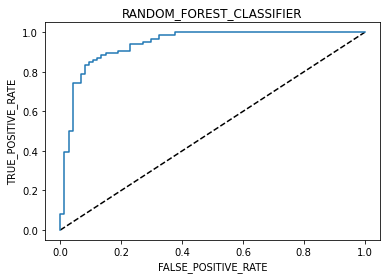

In [310]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='SVC')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('RANDOM_FOREST_CLASSIFIER')
plt.show()

In [311]:
auc_score=roc_auc_score(y_test,(RM3.predict(x_test)))
auc_score

0.8453802639849151

## THERE IS A SLIGHT IMPROVEMENT WRT TO CV MEAN SCORE 

In [302]:
KNN=KNeighborsClassifier()

In [303]:
DD1={'n_neighbors':[4,5,7,8],'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[30,40,50],'p':[2,3,4],'weights':['uniform','distance']}

In [283]:
GD=GridSearchCV(KNN,DD1,cv=5,scoring='accuracy')

In [284]:
GD.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 40, 50], 'n_neighbors': [4, 5, 7, 8],
                         'p': [2, 3, 4], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [285]:
GD.best_params_

{'algorithm': 'auto',
 'leaf_size': 30,
 'n_neighbors': 7,
 'p': 3,
 'weights': 'distance'}

In [286]:
KNN3=KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=7,p=3,weights='distance')

In [287]:
KNN3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7, p=3, weights='distance')

In [288]:
PREKNN3=KNN3.predict(x_test)

In [289]:
print(accuracy_score(y_test,PREKNN3))

0.8125


In [290]:
print(confusion_matrix(y_test,PREKNN3))

[[60 14]
 [16 70]]


In [291]:
print(classification_report(y_test,PREKNN3))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        74
           1       0.83      0.81      0.82        86

    accuracy                           0.81       160
   macro avg       0.81      0.81      0.81       160
weighted avg       0.81      0.81      0.81       160



## AUC ROC CURVE 

In [312]:
y_pred_prob7=RM3.predict_proba(x_test)[:,1]

In [313]:
y_pred_prob7

array([0.996     , 0.58404762, 0.83066667, 0.06666667, 0.75166667,
       0.63666667, 0.58166667, 0.        , 0.03      , 0.08666667,
       0.804     , 0.09333333, 0.62433333, 0.05      , 0.91066667,
       0.27990476, 0.60090476, 0.51      , 0.968     , 0.447     ,
       0.124     , 0.50038095, 0.60933333, 0.631     , 0.06233333,
       0.82966667, 0.787     , 0.95666667, 0.86833333, 0.92833333,
       0.78333333, 0.01733333, 0.80333333, 0.69933333, 0.10166667,
       0.35233333, 0.06      , 0.56866667, 0.085     , 0.83      ,
       0.82683333, 0.753     , 0.61766667, 0.94166667, 0.92766667,
       0.41866667, 0.02      , 0.69628571, 0.26333333, 0.78166667,
       0.75990476, 0.42204762, 0.16166667, 0.075     , 0.68566667,
       0.77833333, 0.684     , 0.14      , 0.37109524, 0.66033333,
       0.69216667, 0.672     , 0.515     , 0.89166667, 0.499     ,
       0.552     , 0.89833333, 0.04666667, 0.42857143, 0.397     ,
       0.79433333, 0.04333333, 0.40638095, 0.75666667, 0.03   

In [314]:
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob7)

In [315]:
tpr

array([0.        , 0.        , 0.        , 0.01351351, 0.01351351,
       0.01351351, 0.01351351, 0.01351351, 0.01351351, 0.02702703,
       0.02702703, 0.04054054, 0.04054054, 0.06756757, 0.06756757,
       0.08108108, 0.08108108, 0.09459459, 0.09459459, 0.10810811,
       0.10810811, 0.12162162, 0.12162162, 0.13513514, 0.13513514,
       0.14864865, 0.14864865, 0.18918919, 0.18918919, 0.22972973,
       0.22972973, 0.27027027, 0.27027027, 0.2972973 , 0.2972973 ,
       0.32432432, 0.32432432, 0.37837838, 0.37837838, 0.44594595,
       0.47297297, 0.81081081, 0.83783784, 0.85135135, 0.90540541,
       0.95945946, 1.        ])

In [316]:
fpr

array([0.        , 0.01162791, 0.08139535, 0.08139535, 0.18604651,
       0.20930233, 0.3372093 , 0.36046512, 0.39534884, 0.39534884,
       0.5       , 0.5       , 0.74418605, 0.74418605, 0.79069767,
       0.79069767, 0.8372093 , 0.8372093 , 0.84883721, 0.84883721,
       0.86046512, 0.86046512, 0.87209302, 0.87209302, 0.88372093,
       0.88372093, 0.89534884, 0.89534884, 0.90697674, 0.90697674,
       0.94186047, 0.94186047, 0.95348837, 0.95348837, 0.96511628,
       0.96511628, 0.98837209, 0.98837209, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [317]:
thresholds

array([1.996     , 0.996     , 0.956     , 0.953     , 0.89833333,
       0.89166667, 0.83      , 0.82966667, 0.82416667, 0.81933333,
       0.787     , 0.78333333, 0.68433333, 0.67966667, 0.65833333,
       0.6397619 , 0.62133333, 0.61766667, 0.61142857, 0.60933333,
       0.60090476, 0.58404762, 0.58166667, 0.56866667, 0.552     ,
       0.53433333, 0.534     , 0.515     , 0.51466667, 0.499     ,
       0.44433333, 0.41866667, 0.4107619 , 0.397     , 0.37333333,
       0.35442857, 0.30404762, 0.23866667, 0.23733333, 0.14      ,
       0.124     , 0.03733333, 0.03      , 0.024     , 0.02      ,
       0.01      , 0.        ])

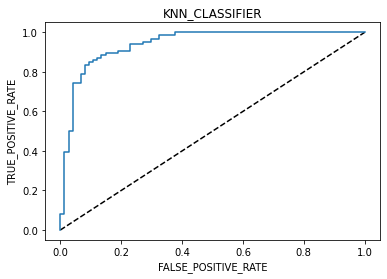

In [318]:
plt.plot([0,1],[0,1],'k--')
plt.plot(tpr,fpr,label='KNN')
plt.xlabel('FALSE_POSITIVE_RATE')
plt.ylabel('TRUE_POSITIVE_RATE')
plt.title('KNN_CLASSIFIER')
plt.show()

In [319]:
auc_score=roc_auc_score(y_test,(KNN3.predict(x_test)))
auc_score

0.8123821495914518

## THERE IS AN IMPROVEMENT IN ACCURACY SCORE AS COMPARED TO BOTH KNN MODEL SCORE AND CV MEAN SCORE HENCE WE WILL SELECT THIS MODEL 

## SAVING THE MODEL 

In [320]:
import pickle

In [321]:
filename='churn.pkl'
pickle.dump(KNN3,open(filename,'wb'))

In [322]:
loaded_model6=pickle.load(open('churn.pkl','rb'))

In [323]:
conclusion6=pd.DataFrame([loaded_model6.predict(x_test)[:],y_test[:]],index=['PREDICTED','ORIGINAL'])

In [324]:
conclusion6

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
PREDICTED,1,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
ORIGINAL,1,0,1,0,1,1,1,0,0,0,...,0,1,0,1,1,1,1,1,1,0
